In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv("traffic_data.csv")

def draw_plot(data):
    for col in data.columns:
        figure = plt.figure(figsize=(30, 10))
        plt.plot(data[col], color='blue', linewidth=0.5)
        plt.title(f"Biểu đồ giao thông tại {col}")
        plt.show()
        

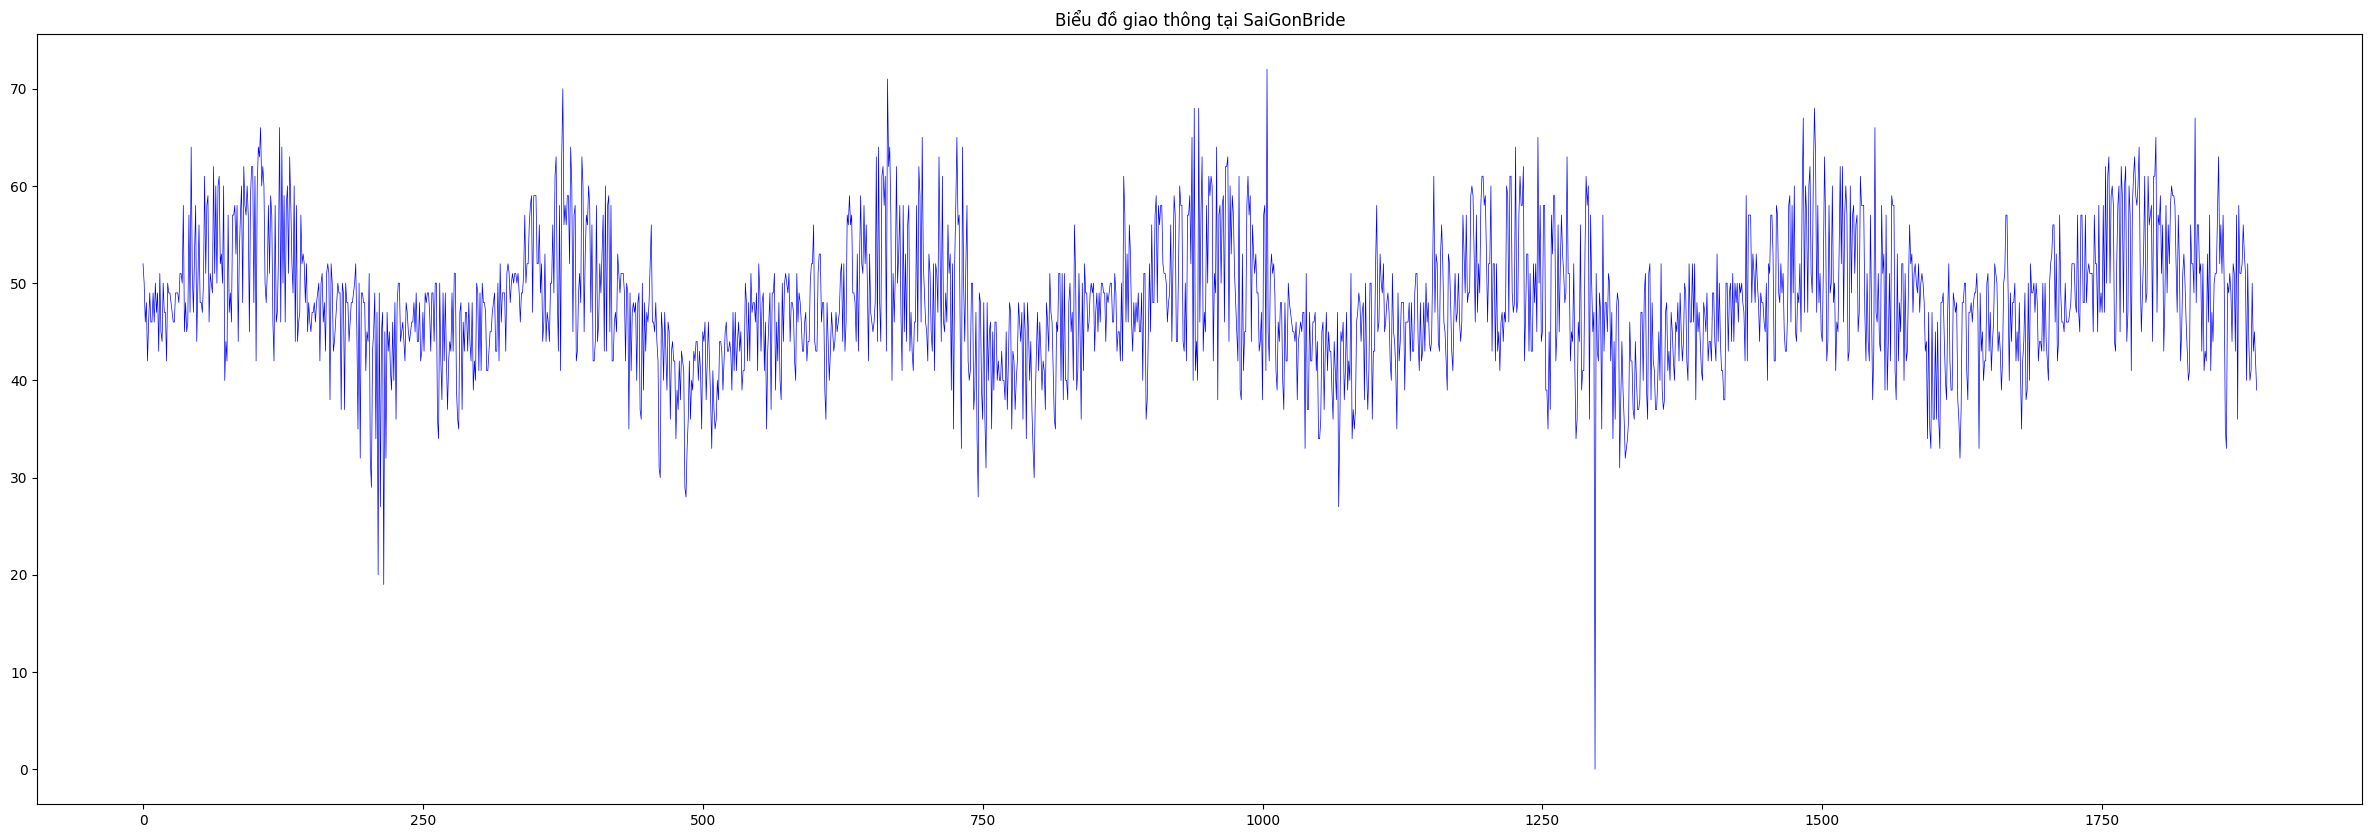

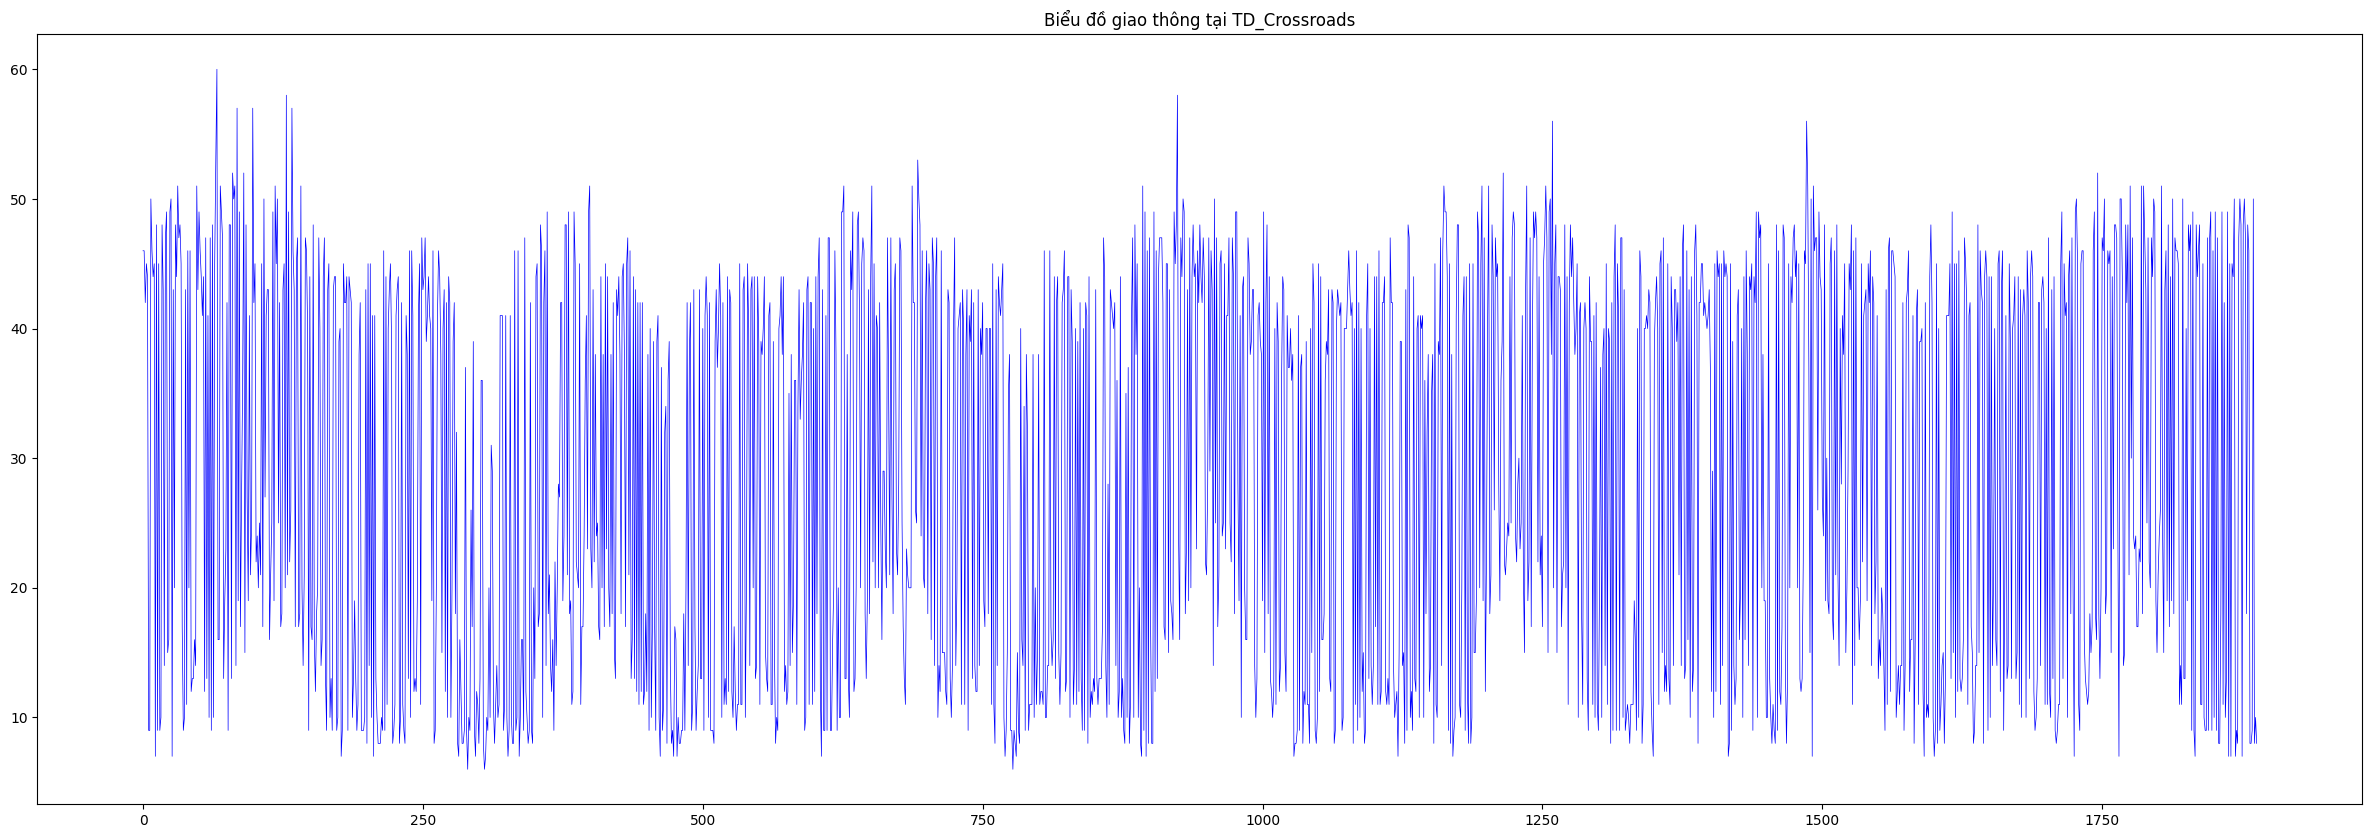

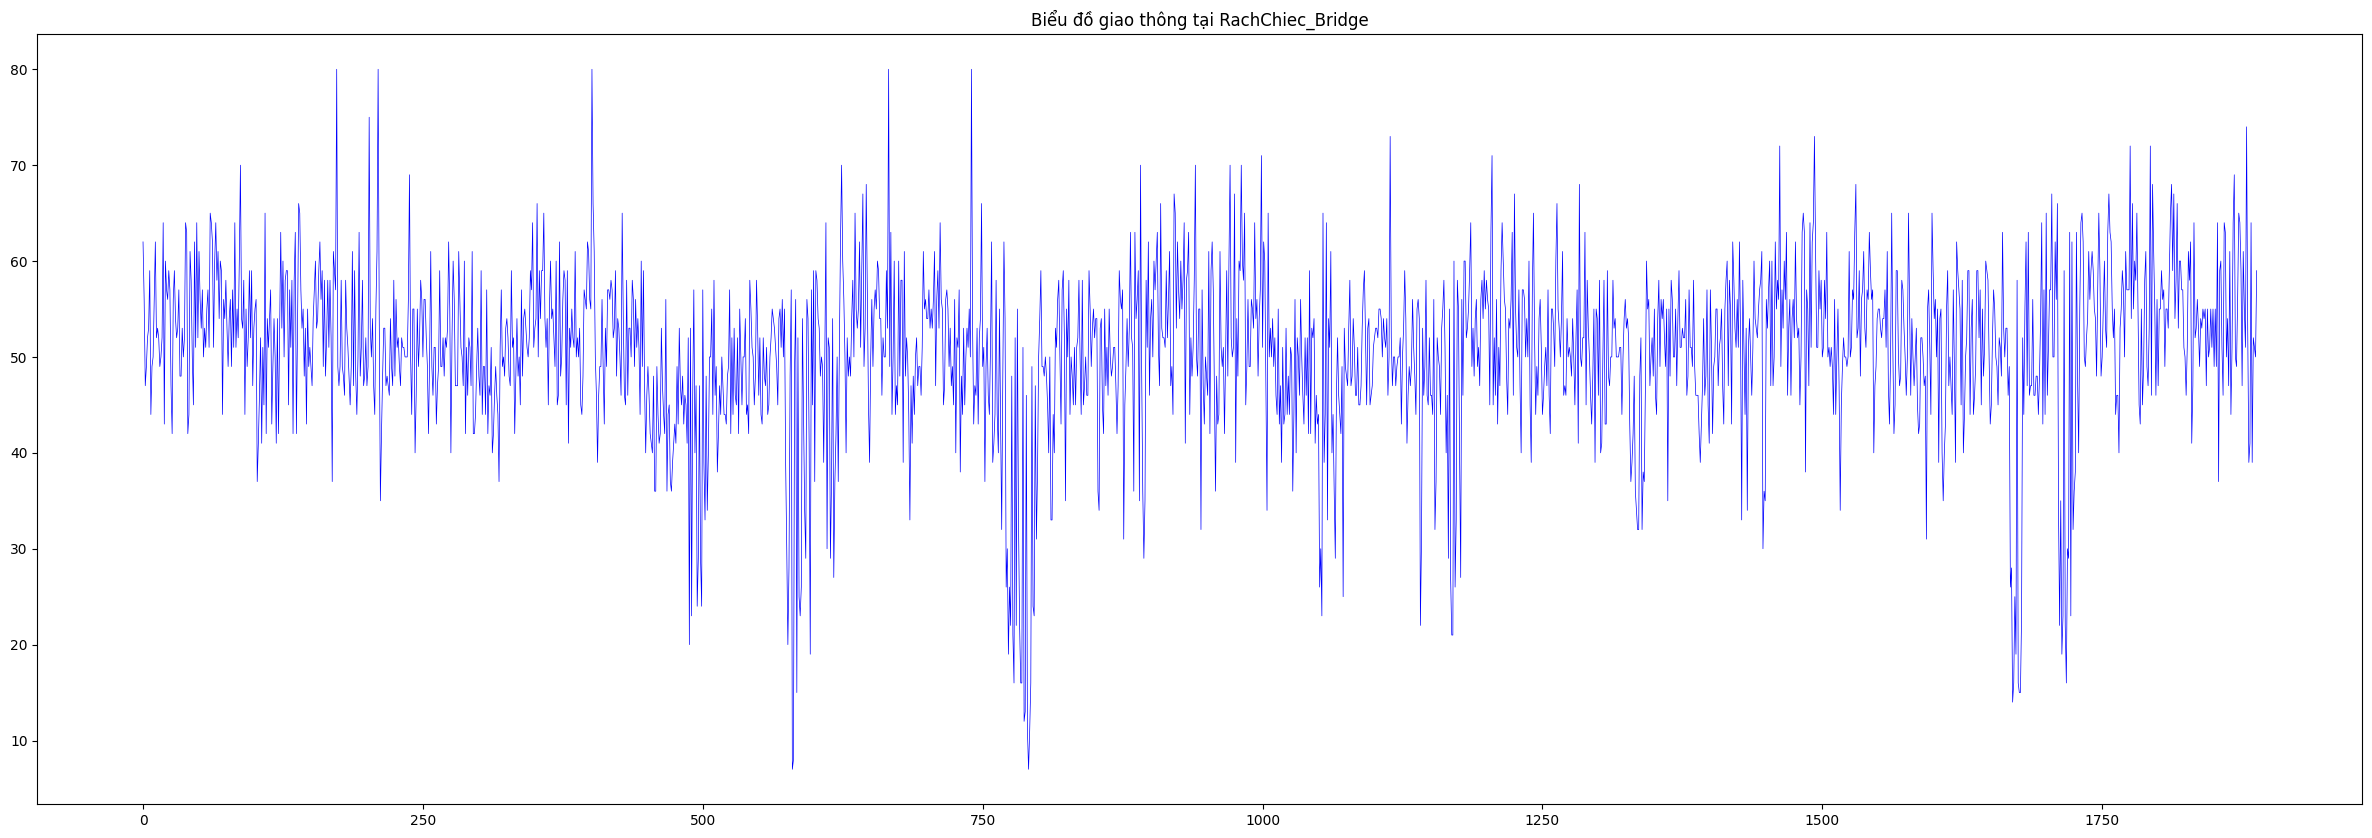

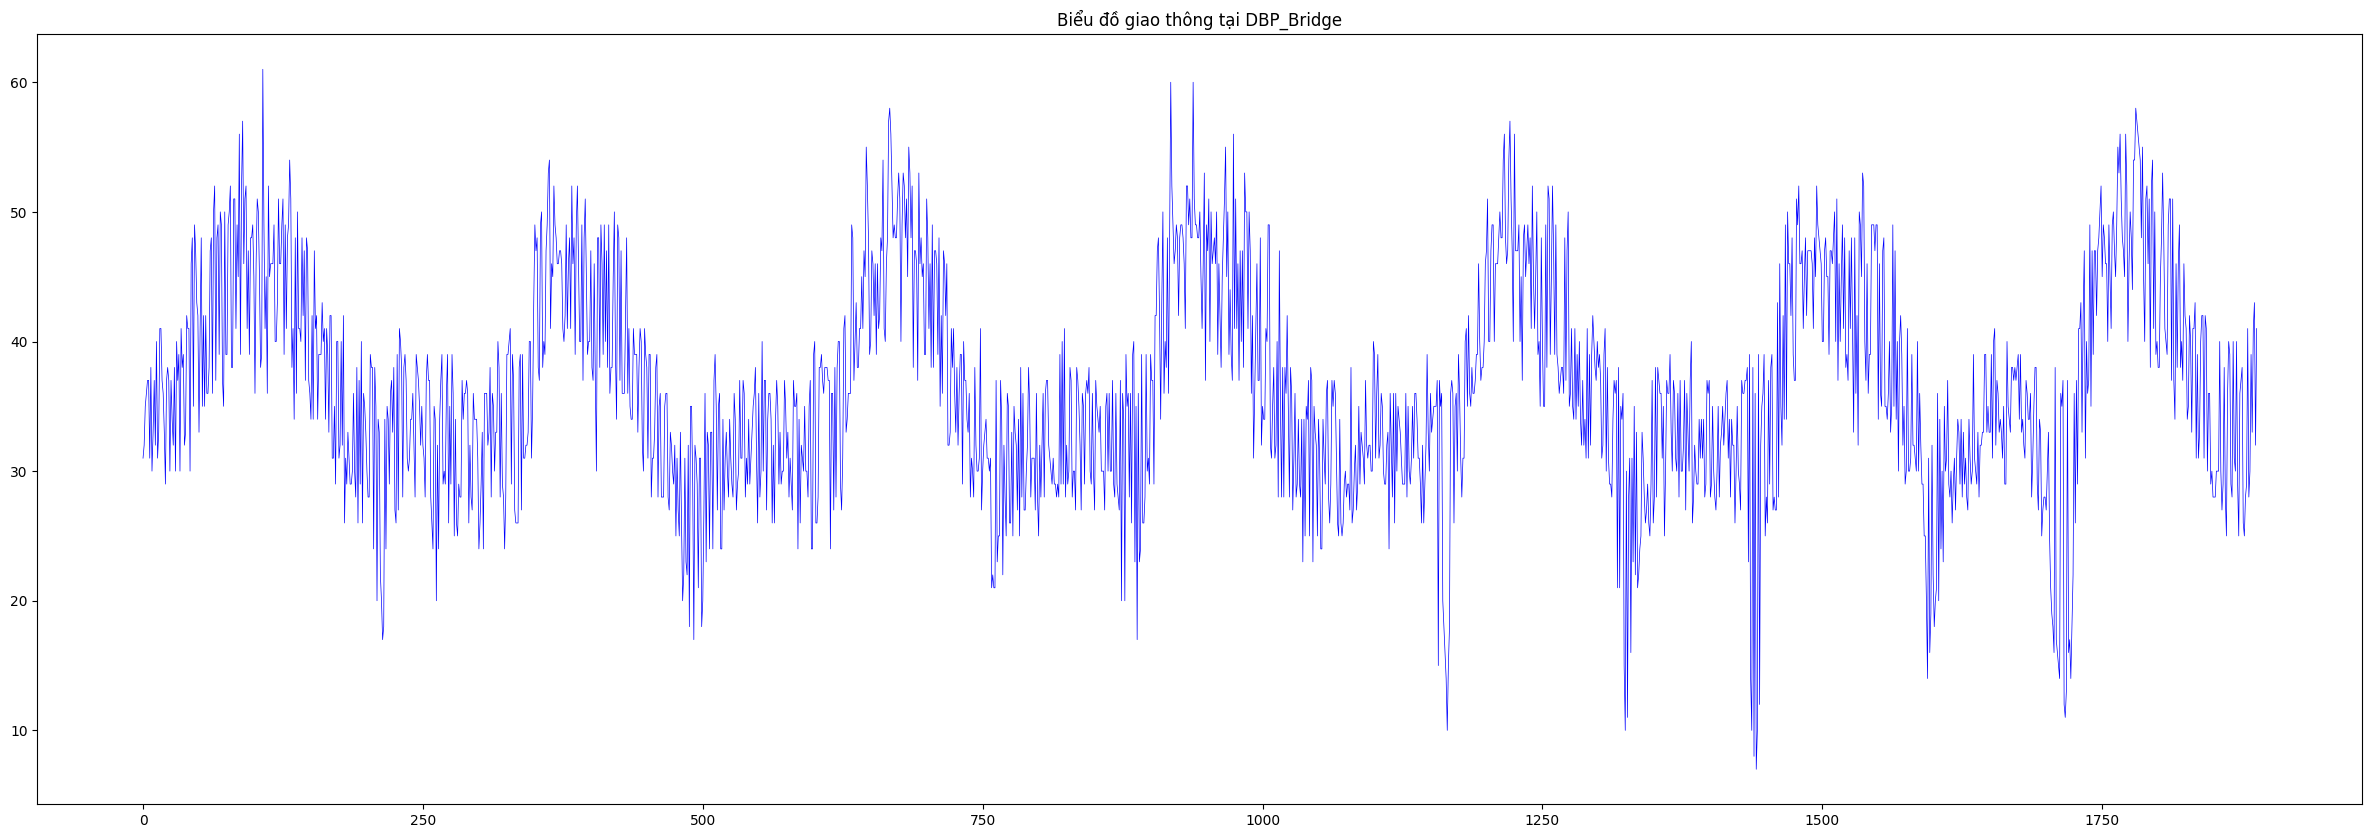

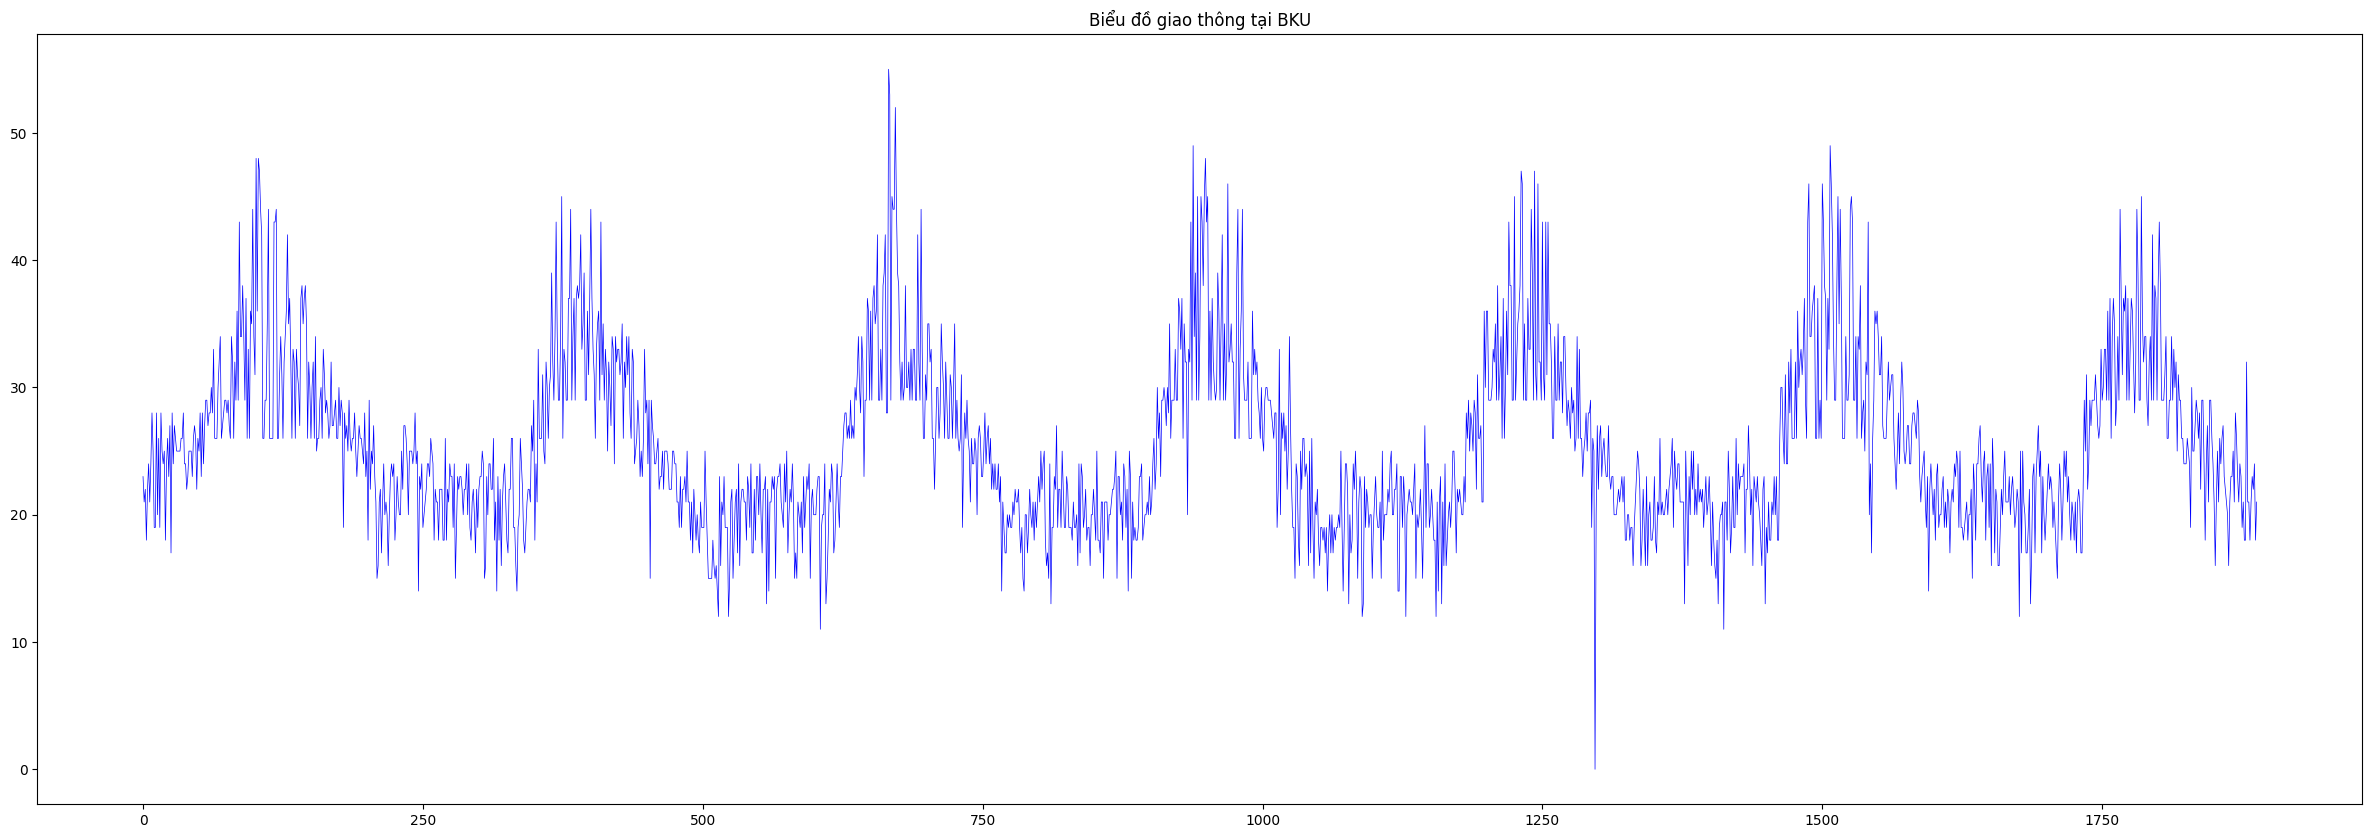

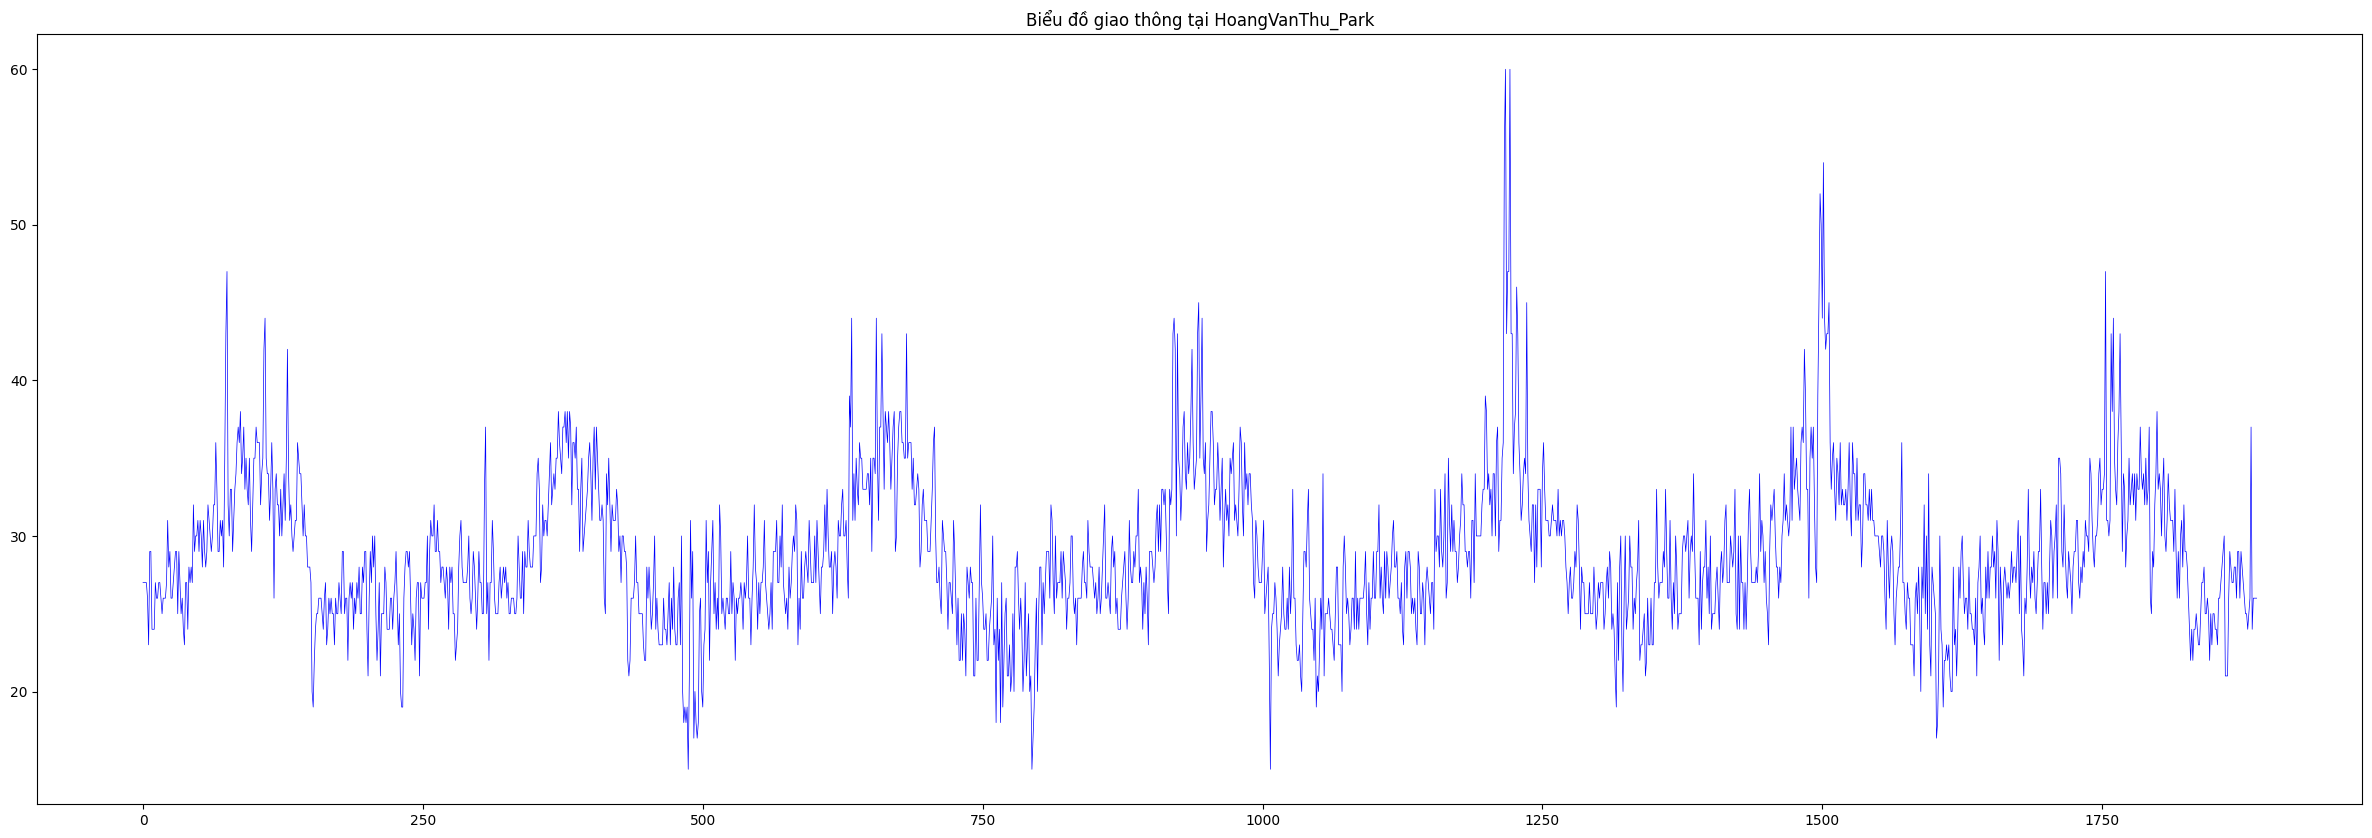

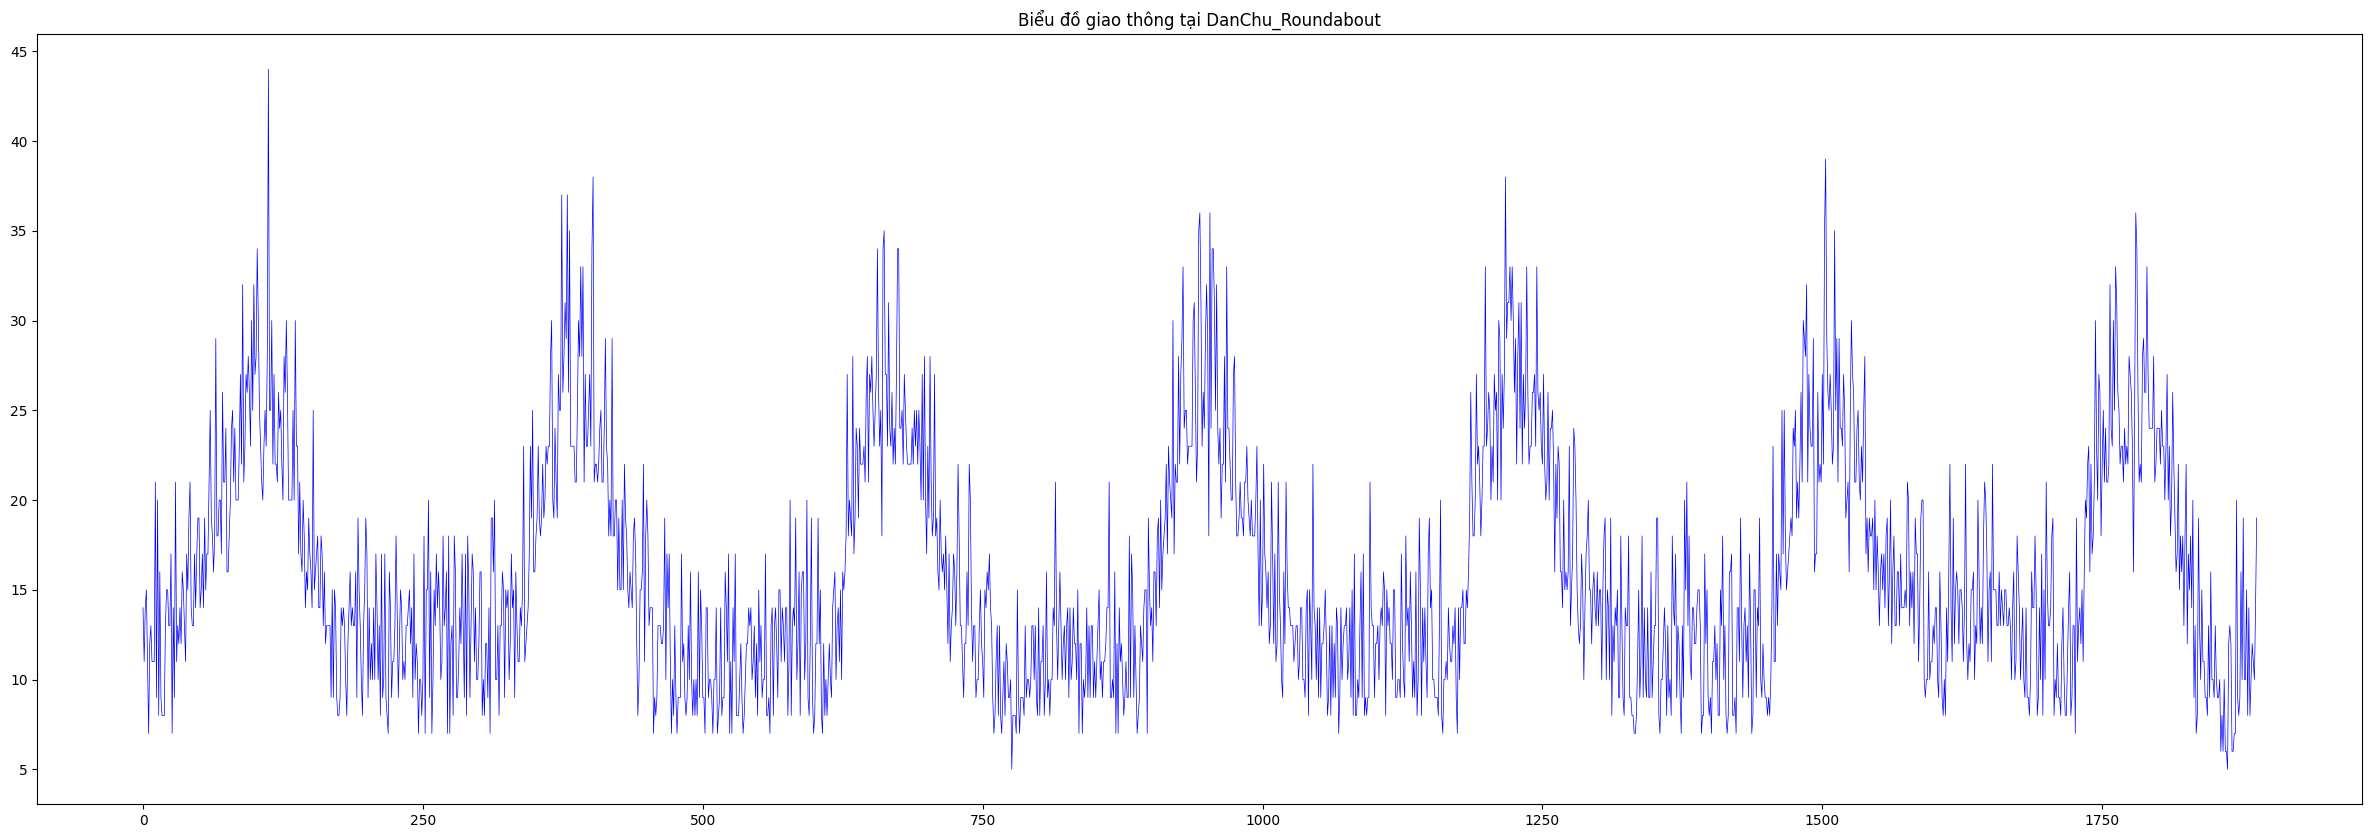

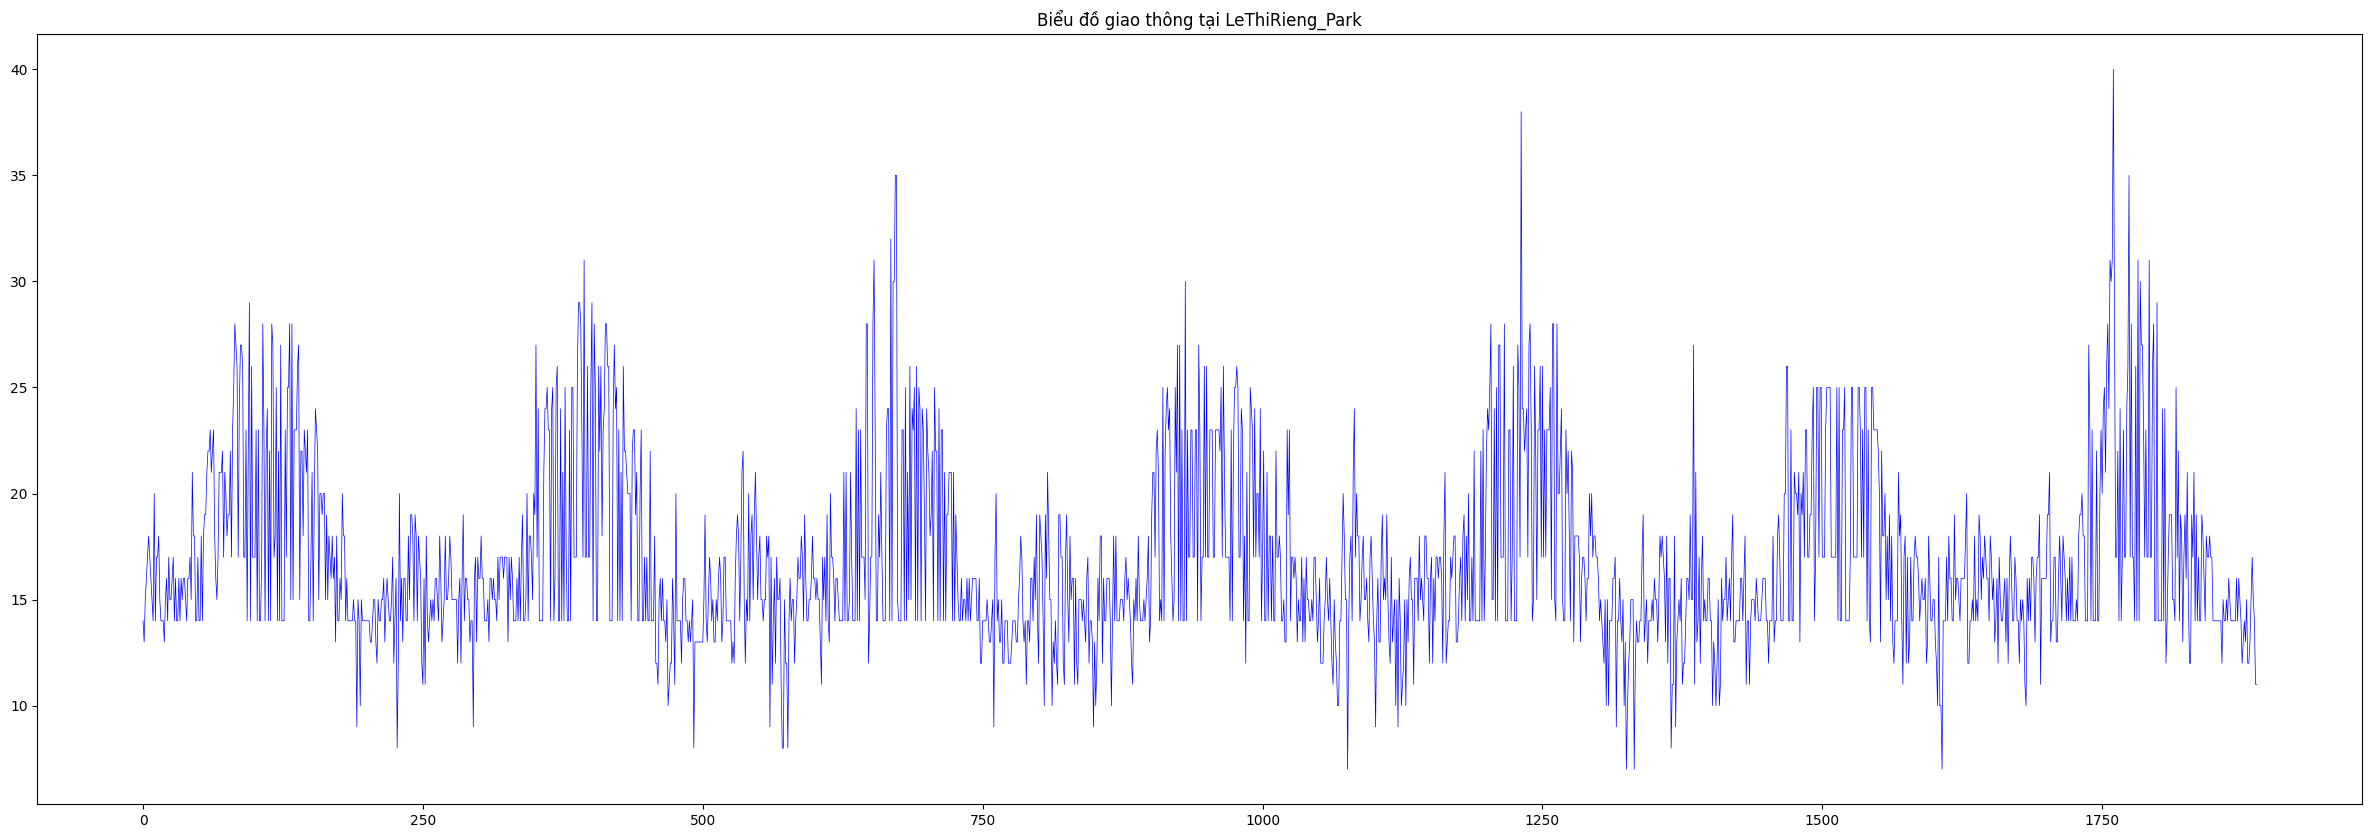

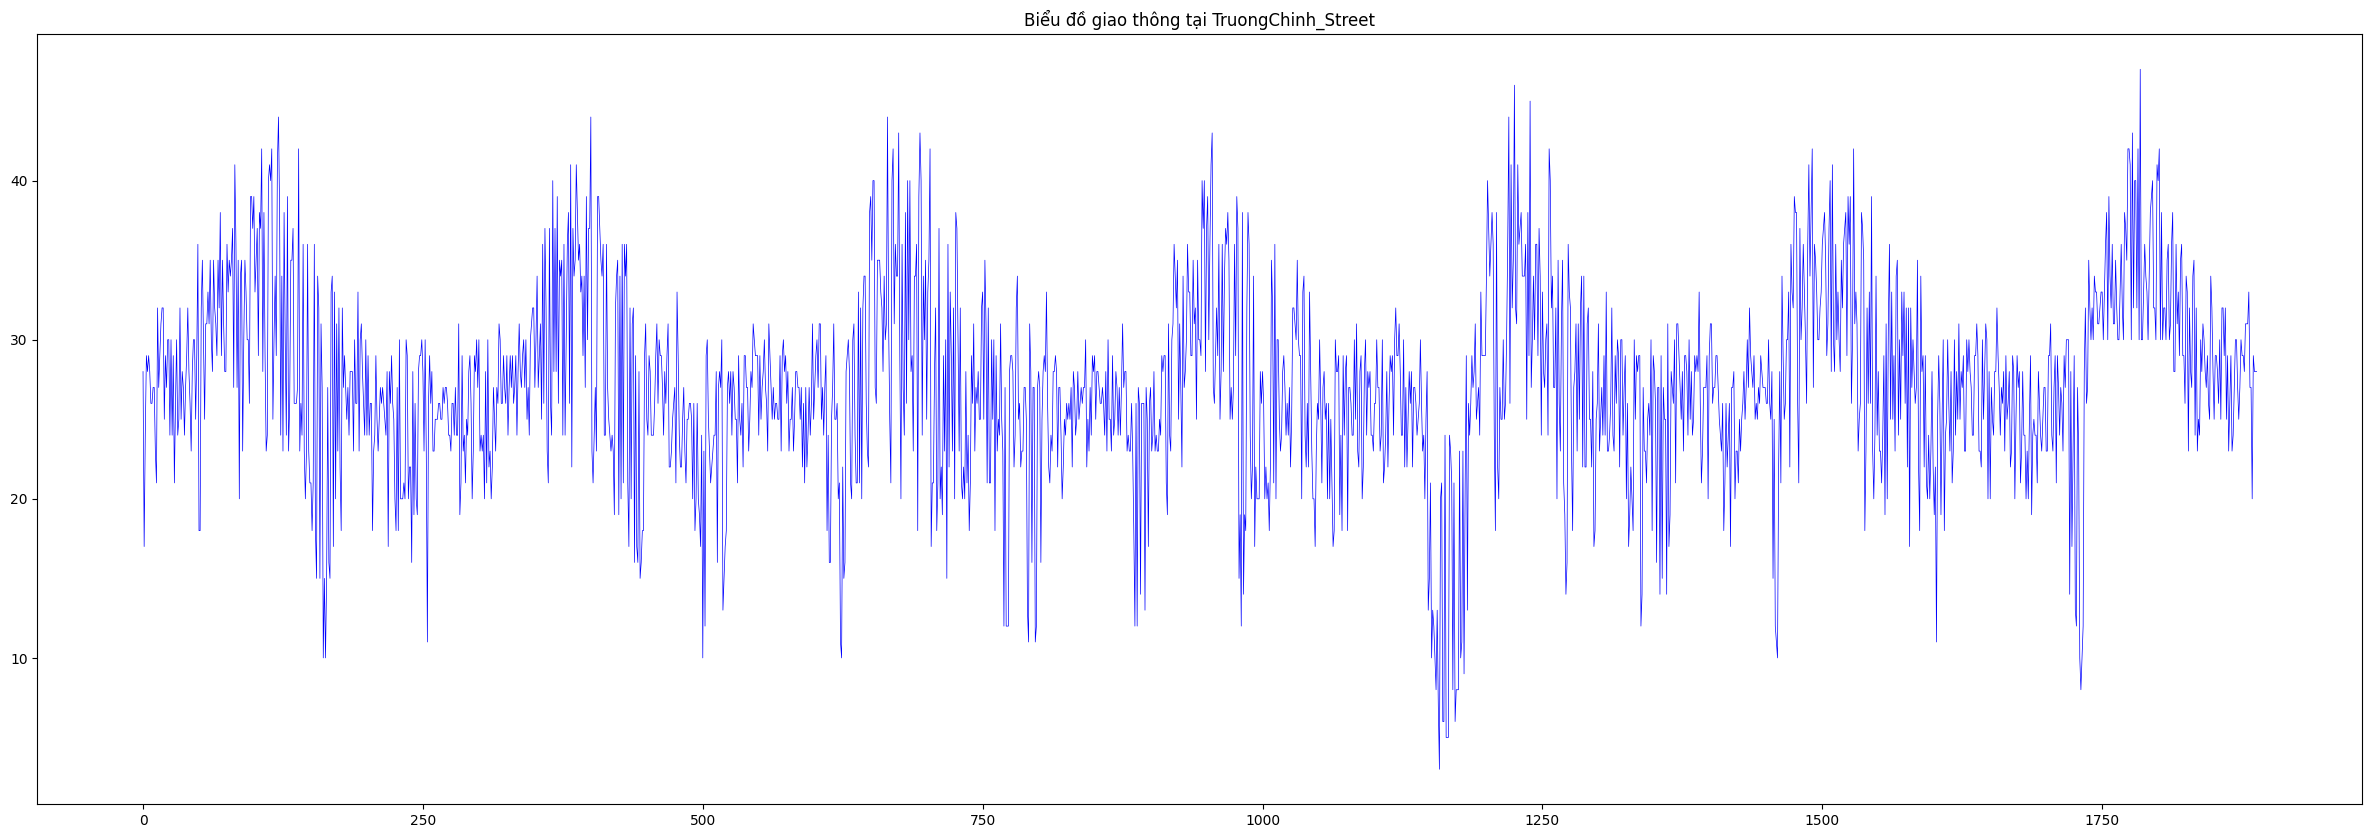

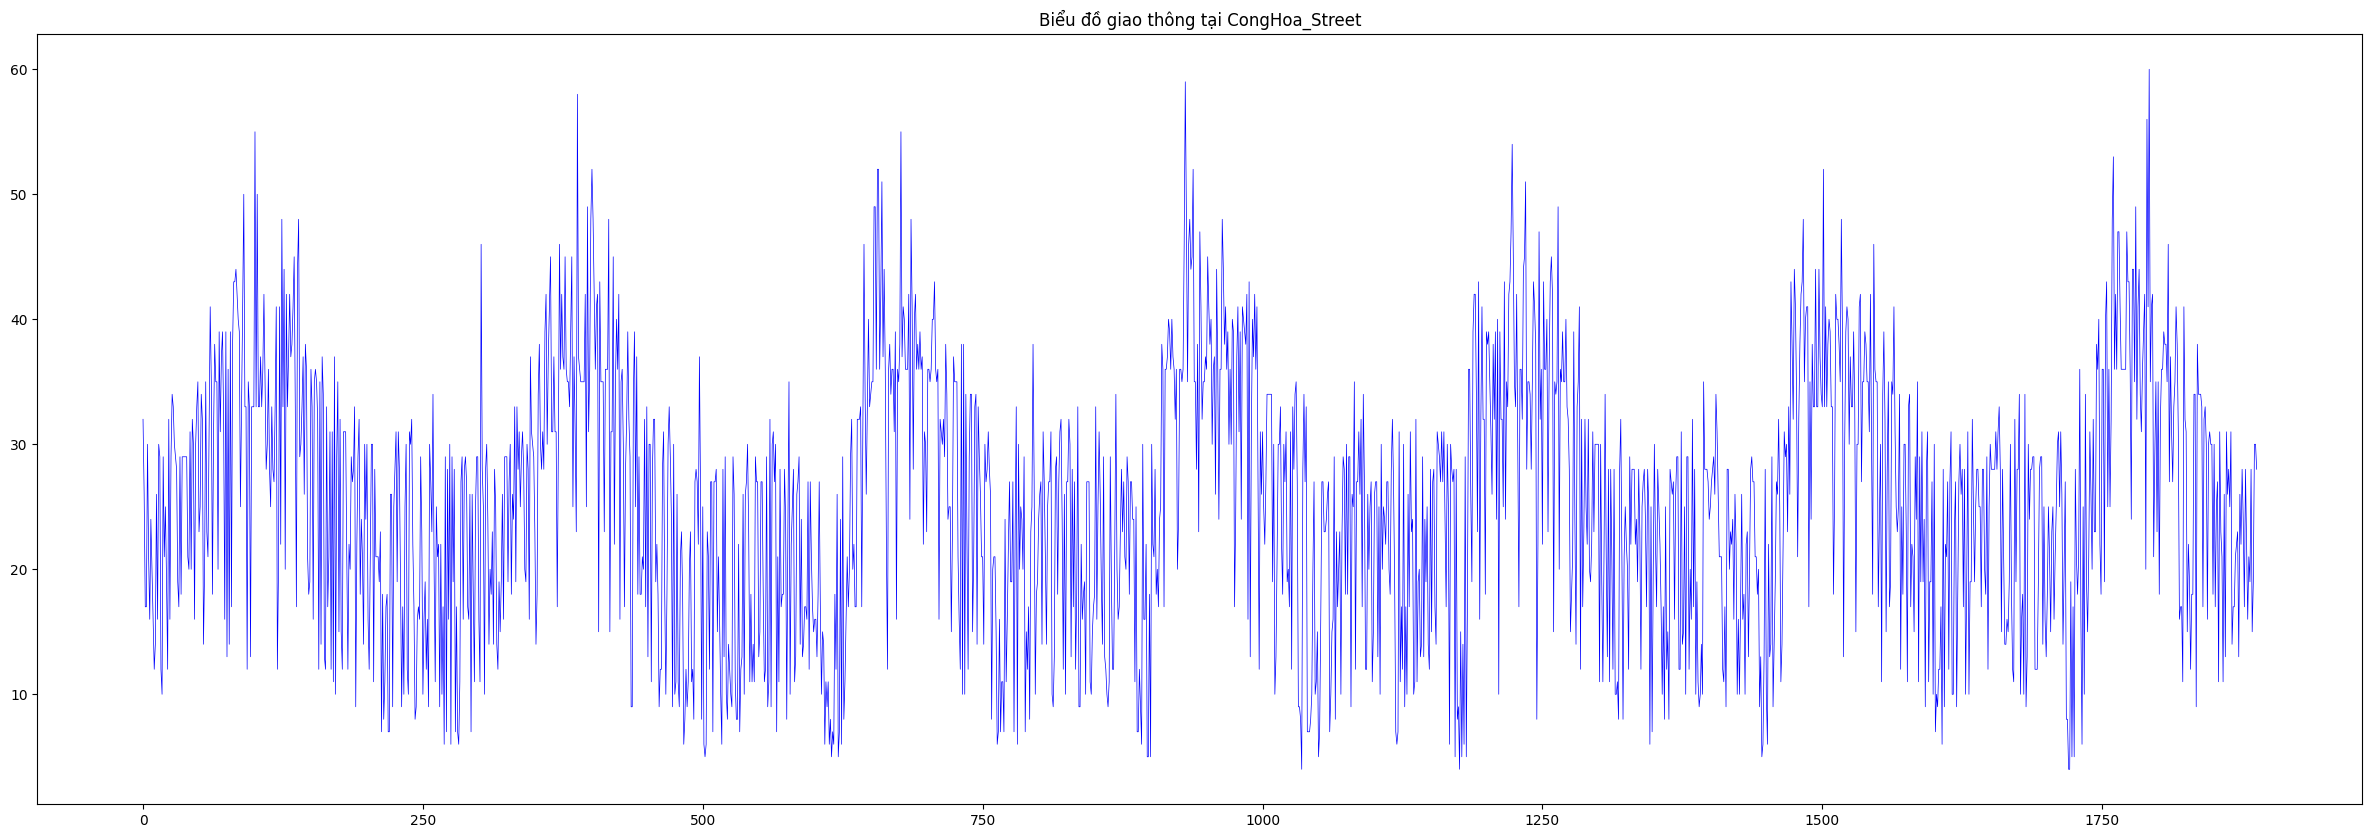

In [17]:
draw_plot(data)

In [15]:
from sklearn.impute import KNNImputer

def handle_outliers_and_fill_knn(data, n_neighbors=5):
    df = data.copy()
    
    for column in df.select_dtypes(include=[np.number]).columns:  # Áp dụng cho các cột số
        # Tính Q1, Q3 và IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Tính ngưỡng
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Thay thế outliers bằng None
        df[column] = df[column].apply(lambda x: None if x < lower_bound or x > upper_bound else x)

    # Sử dụng KNN để điền giá trị thiếu
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    return df_imputed

In [18]:
processed_data = handle_outliers_and_fill_knn(data)

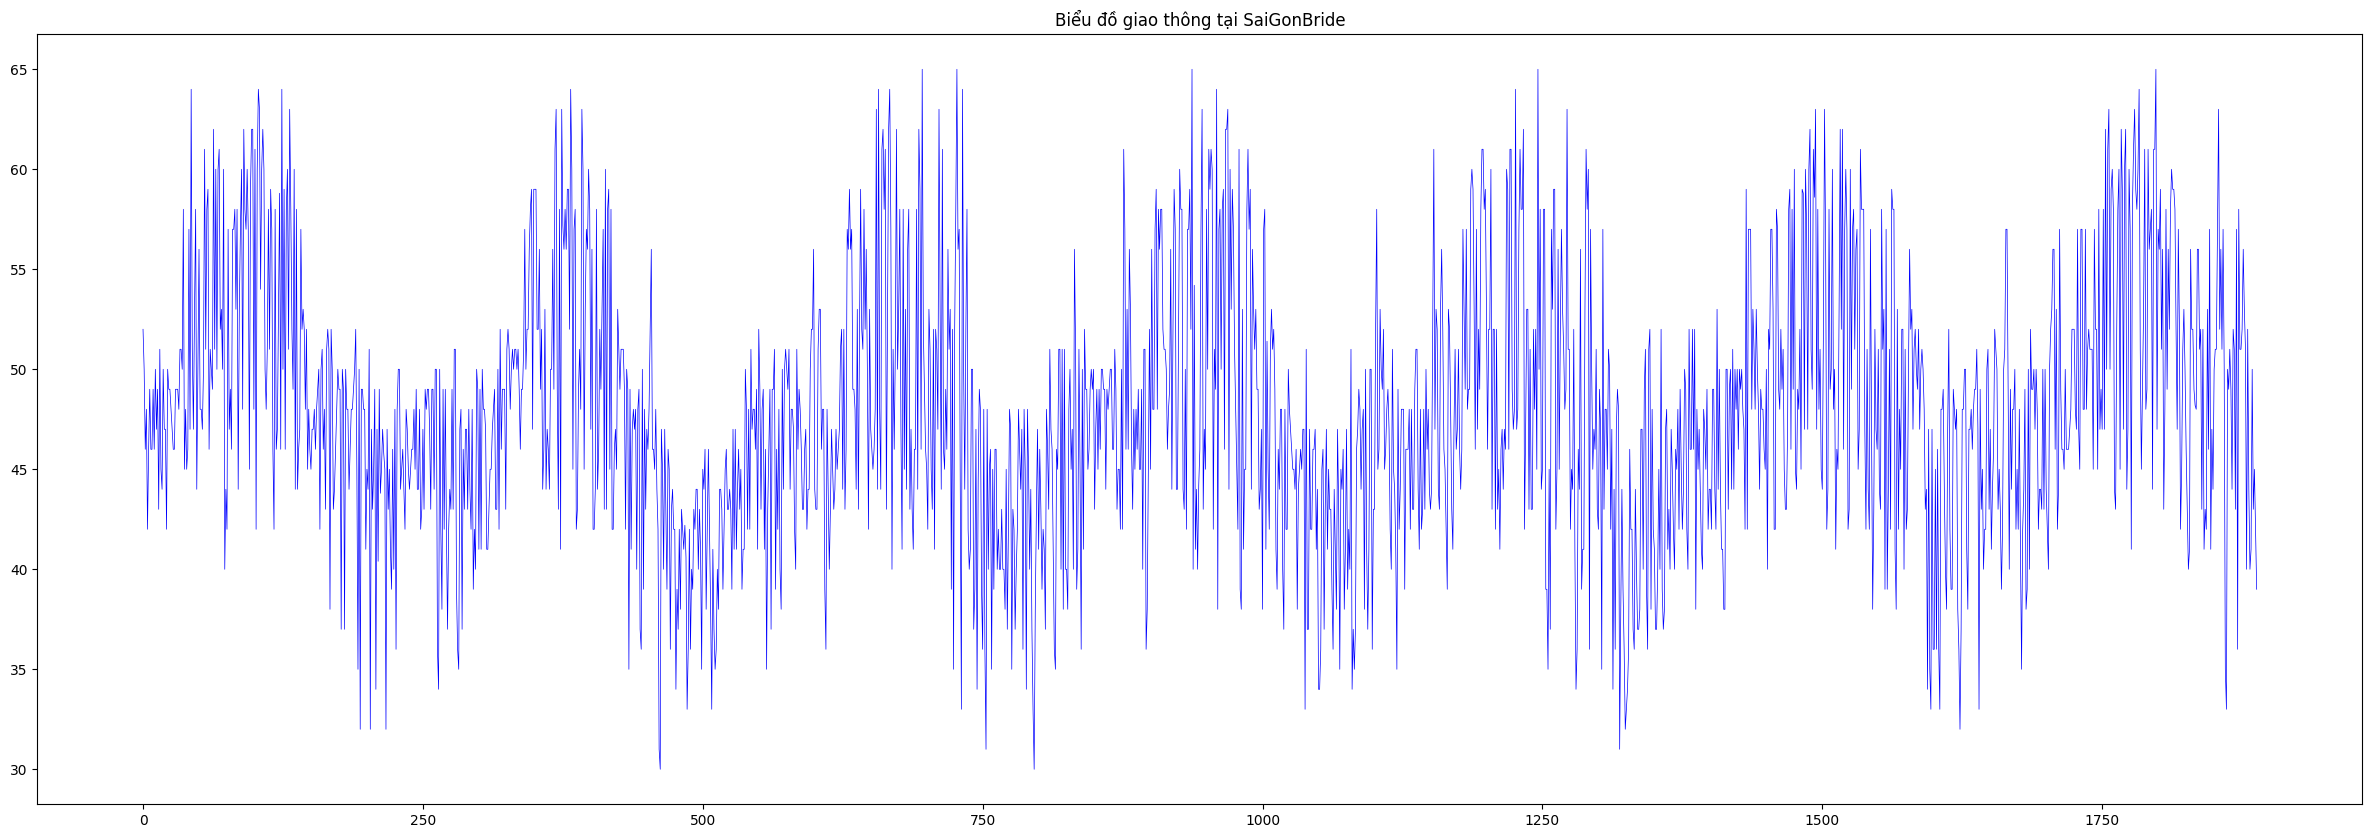

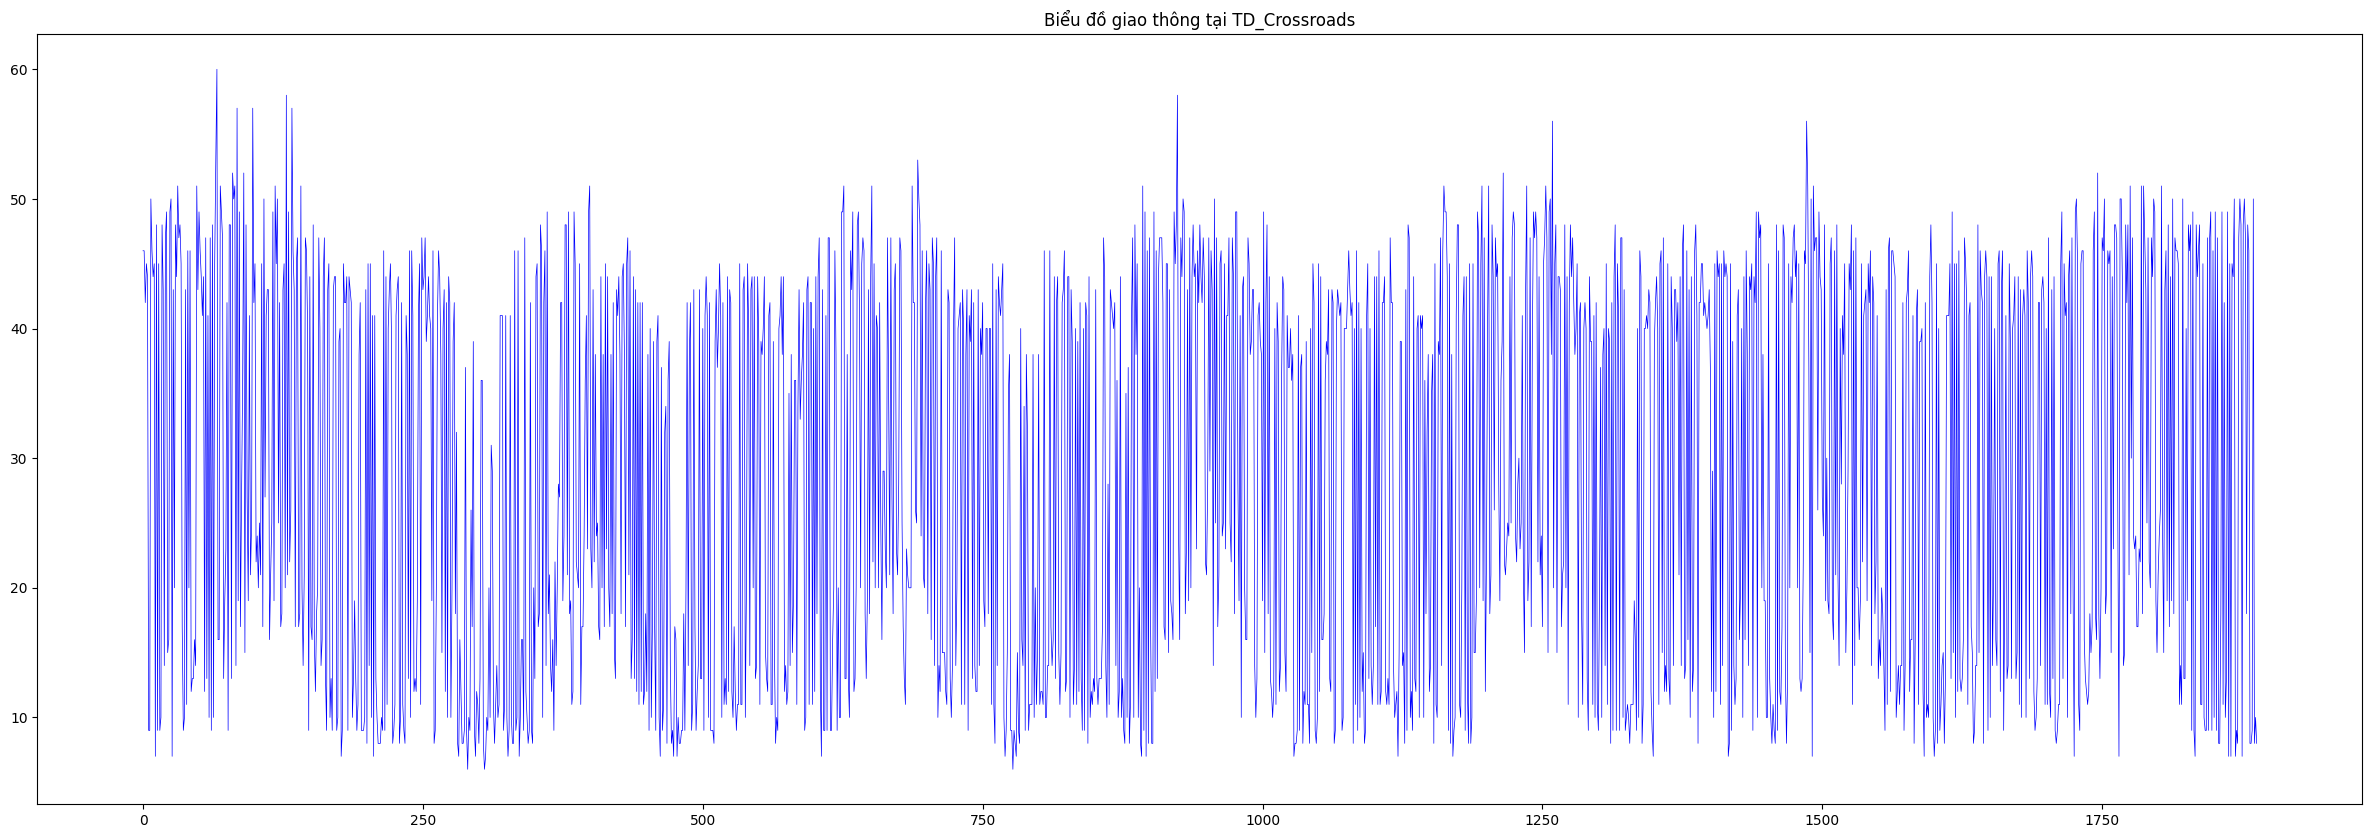

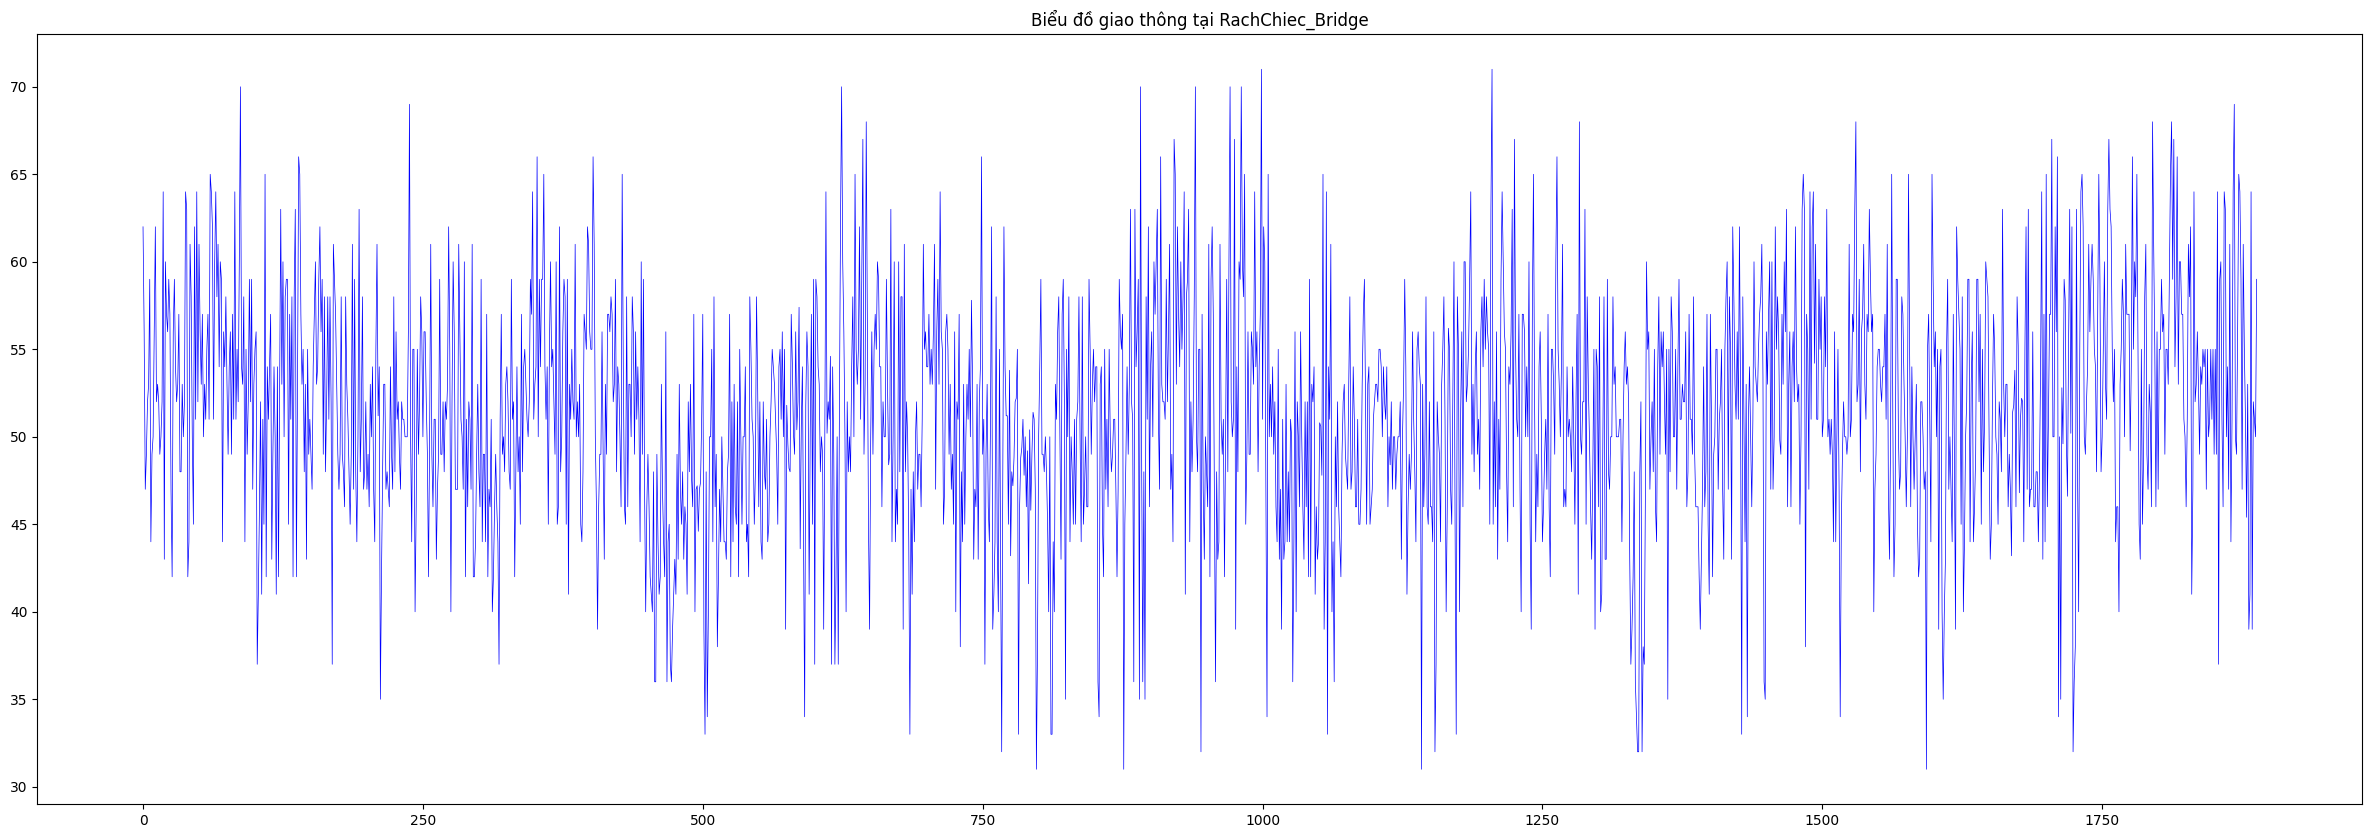

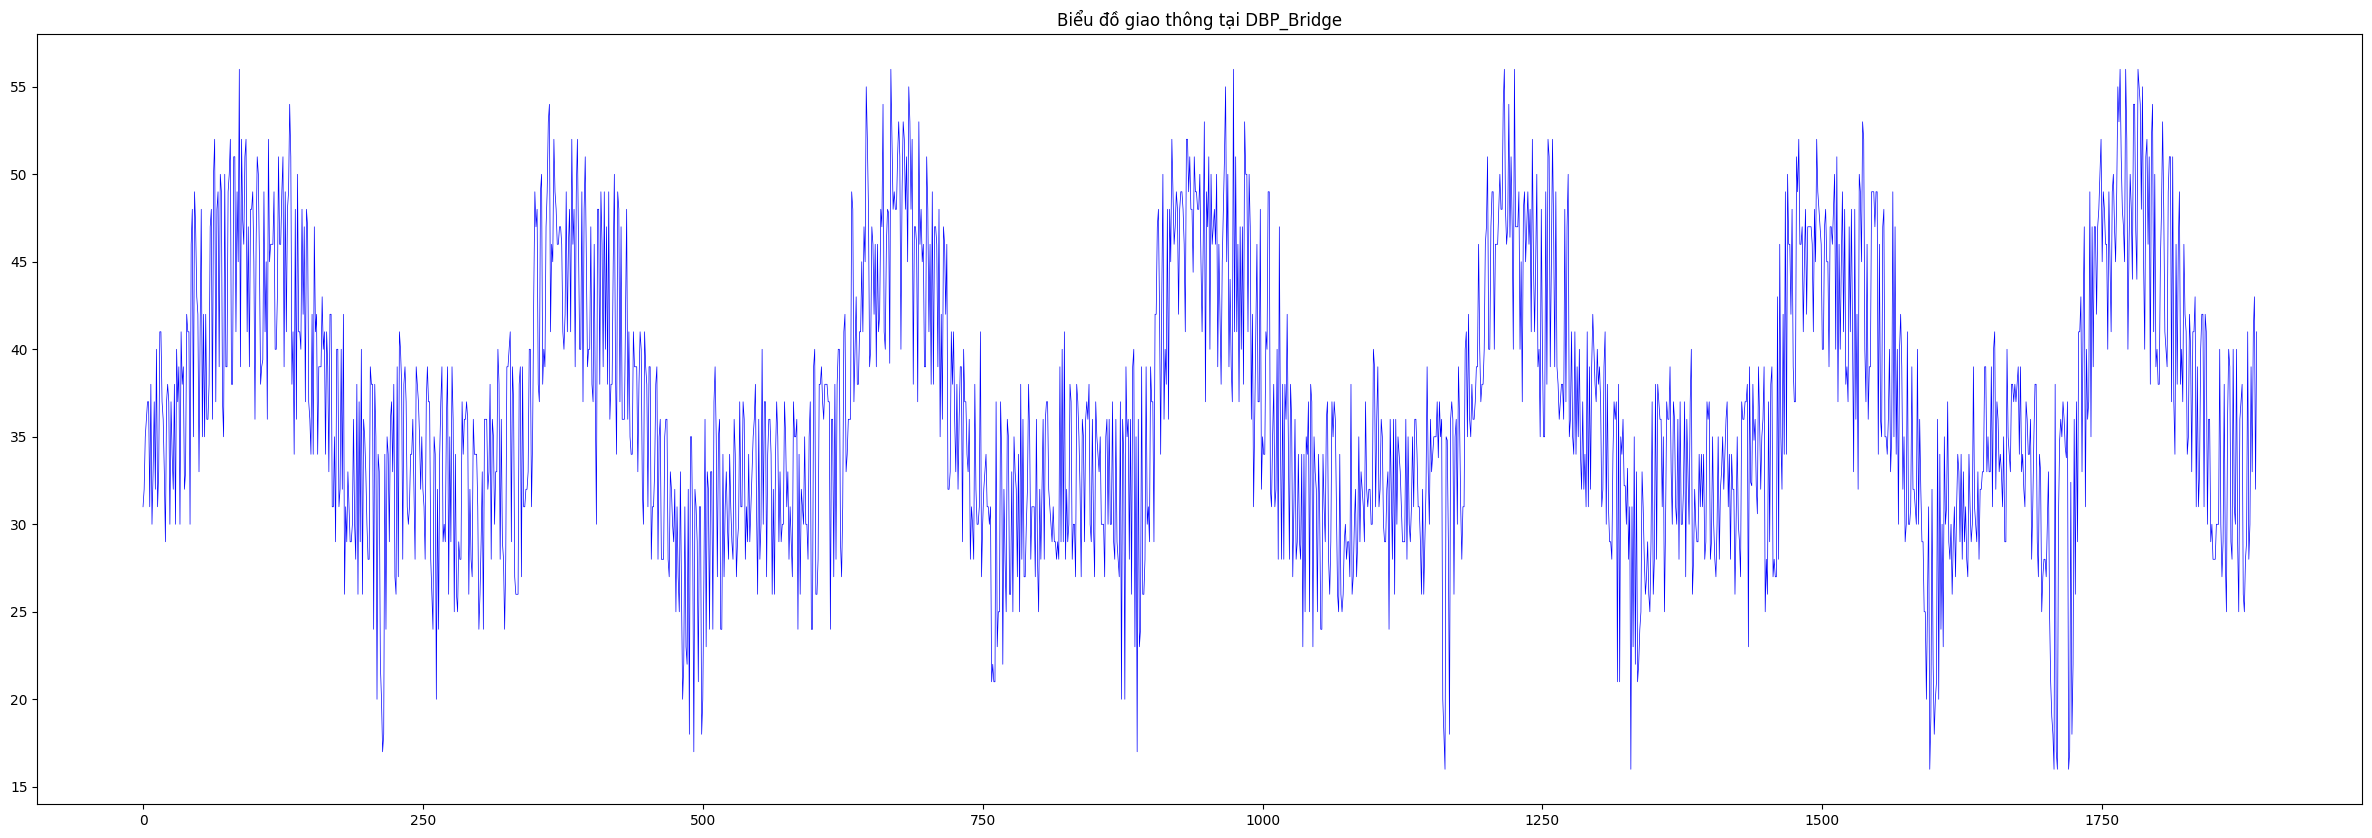

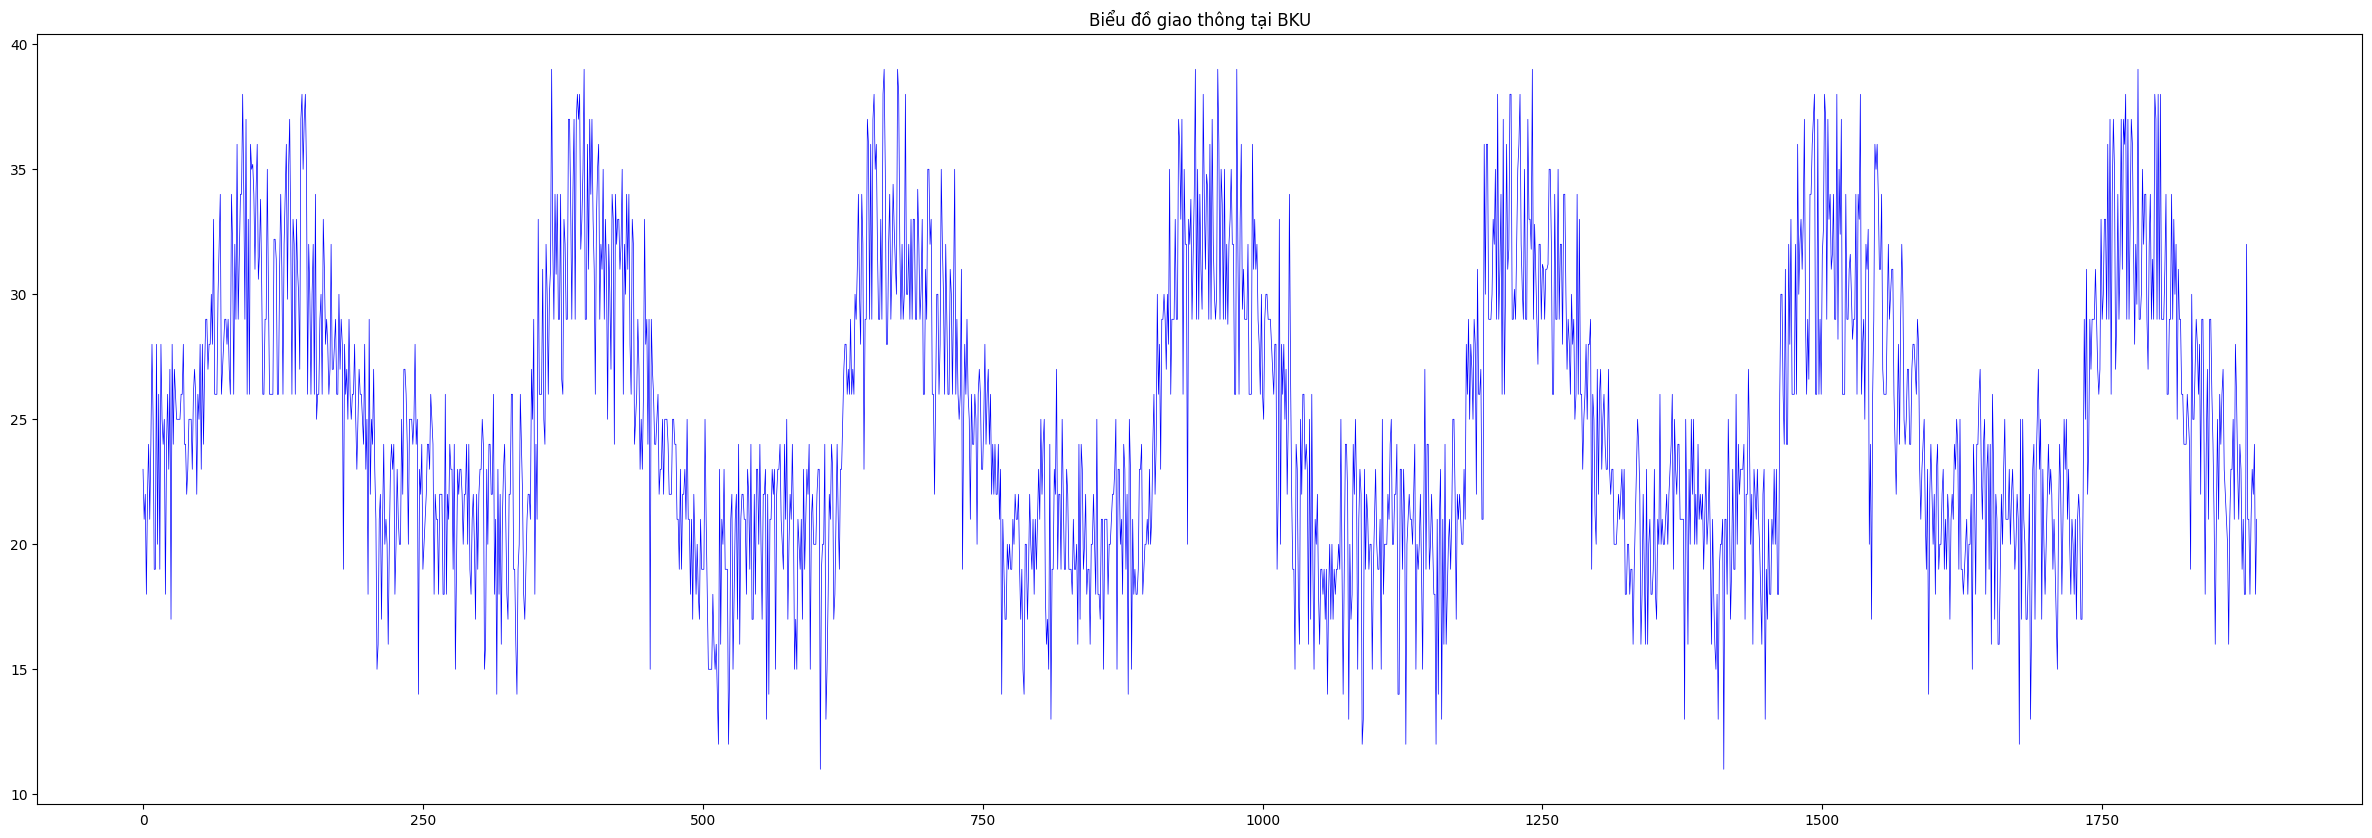

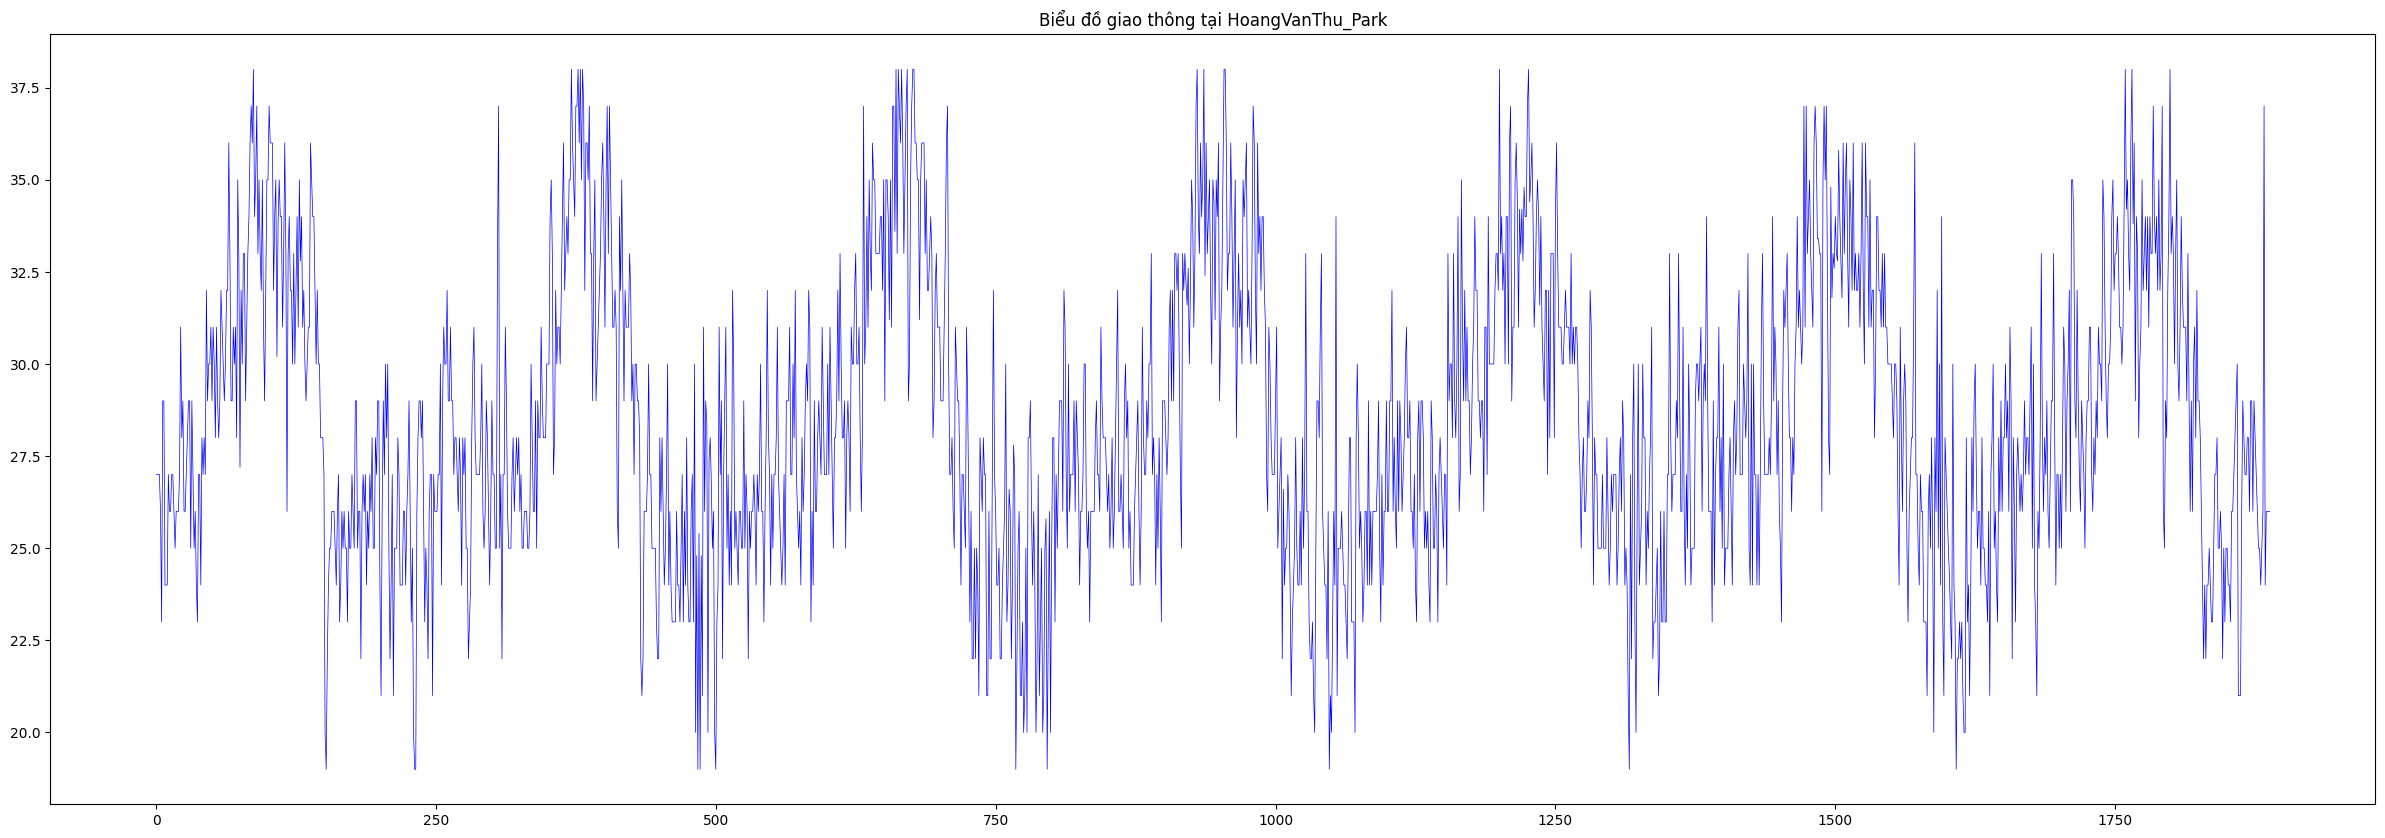

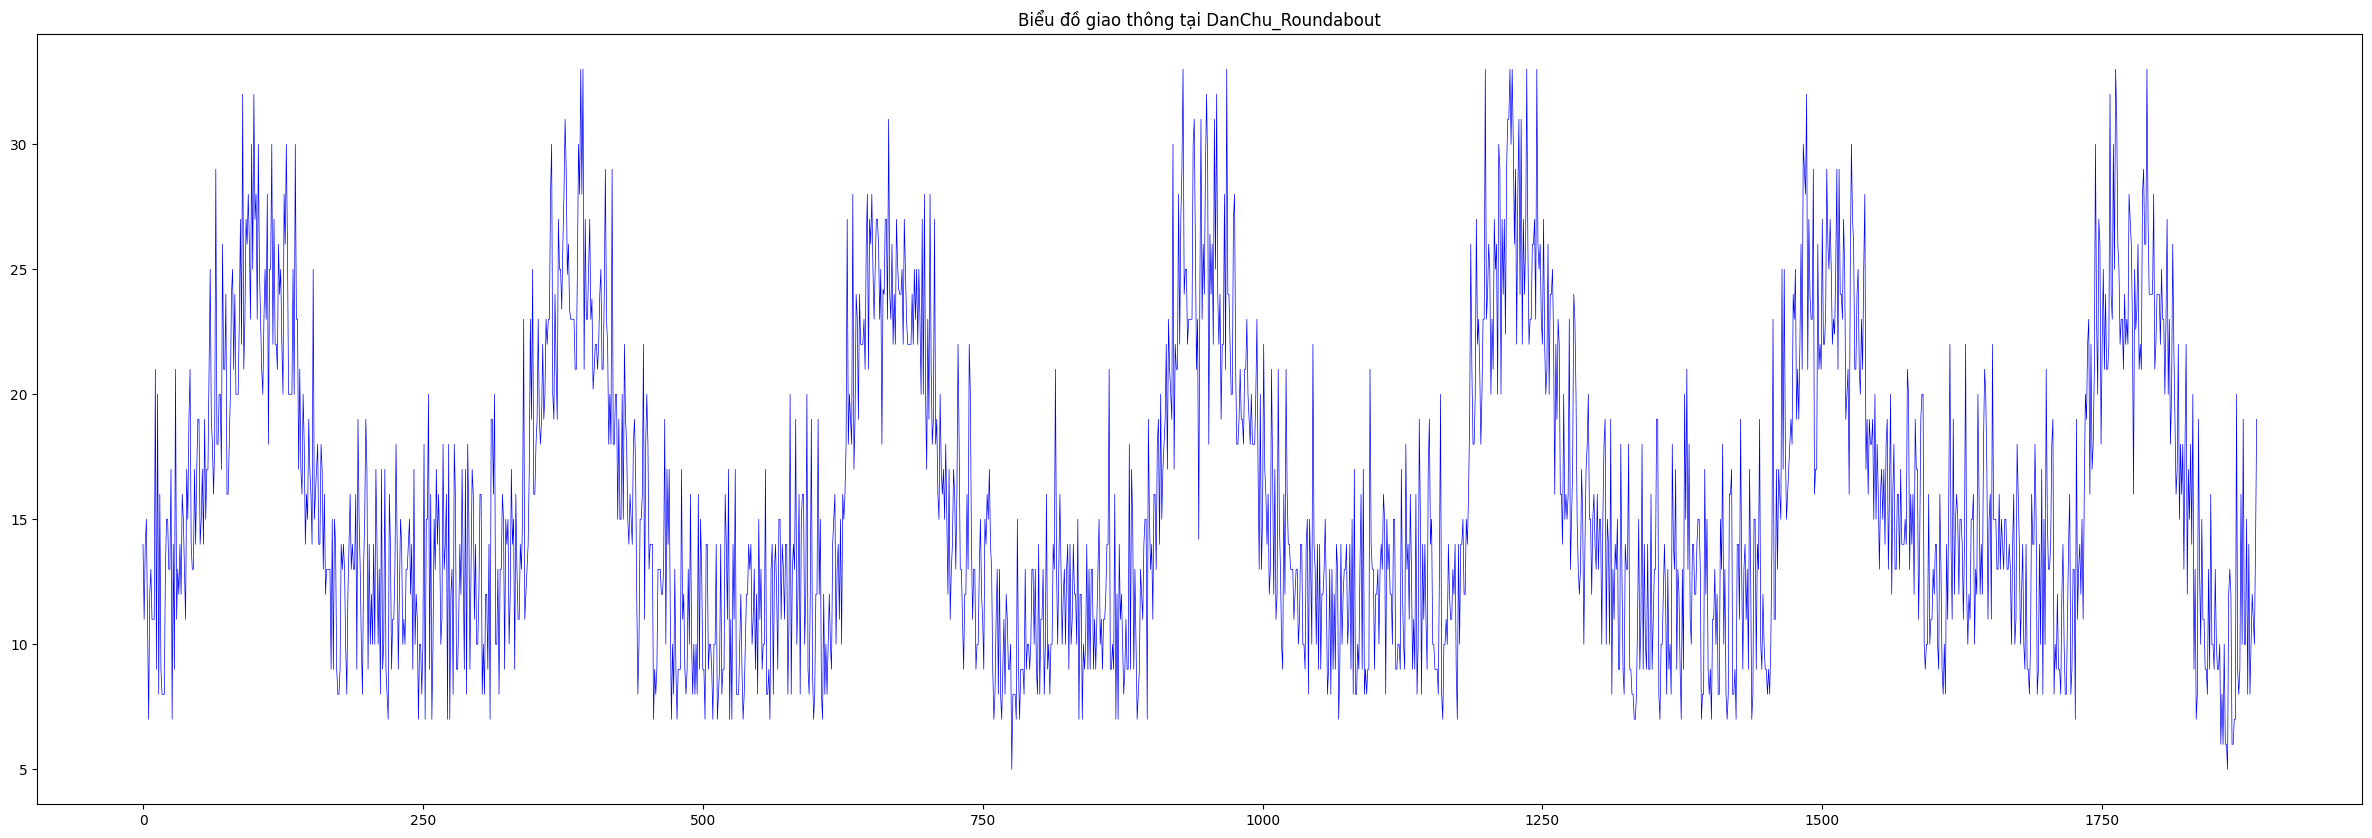

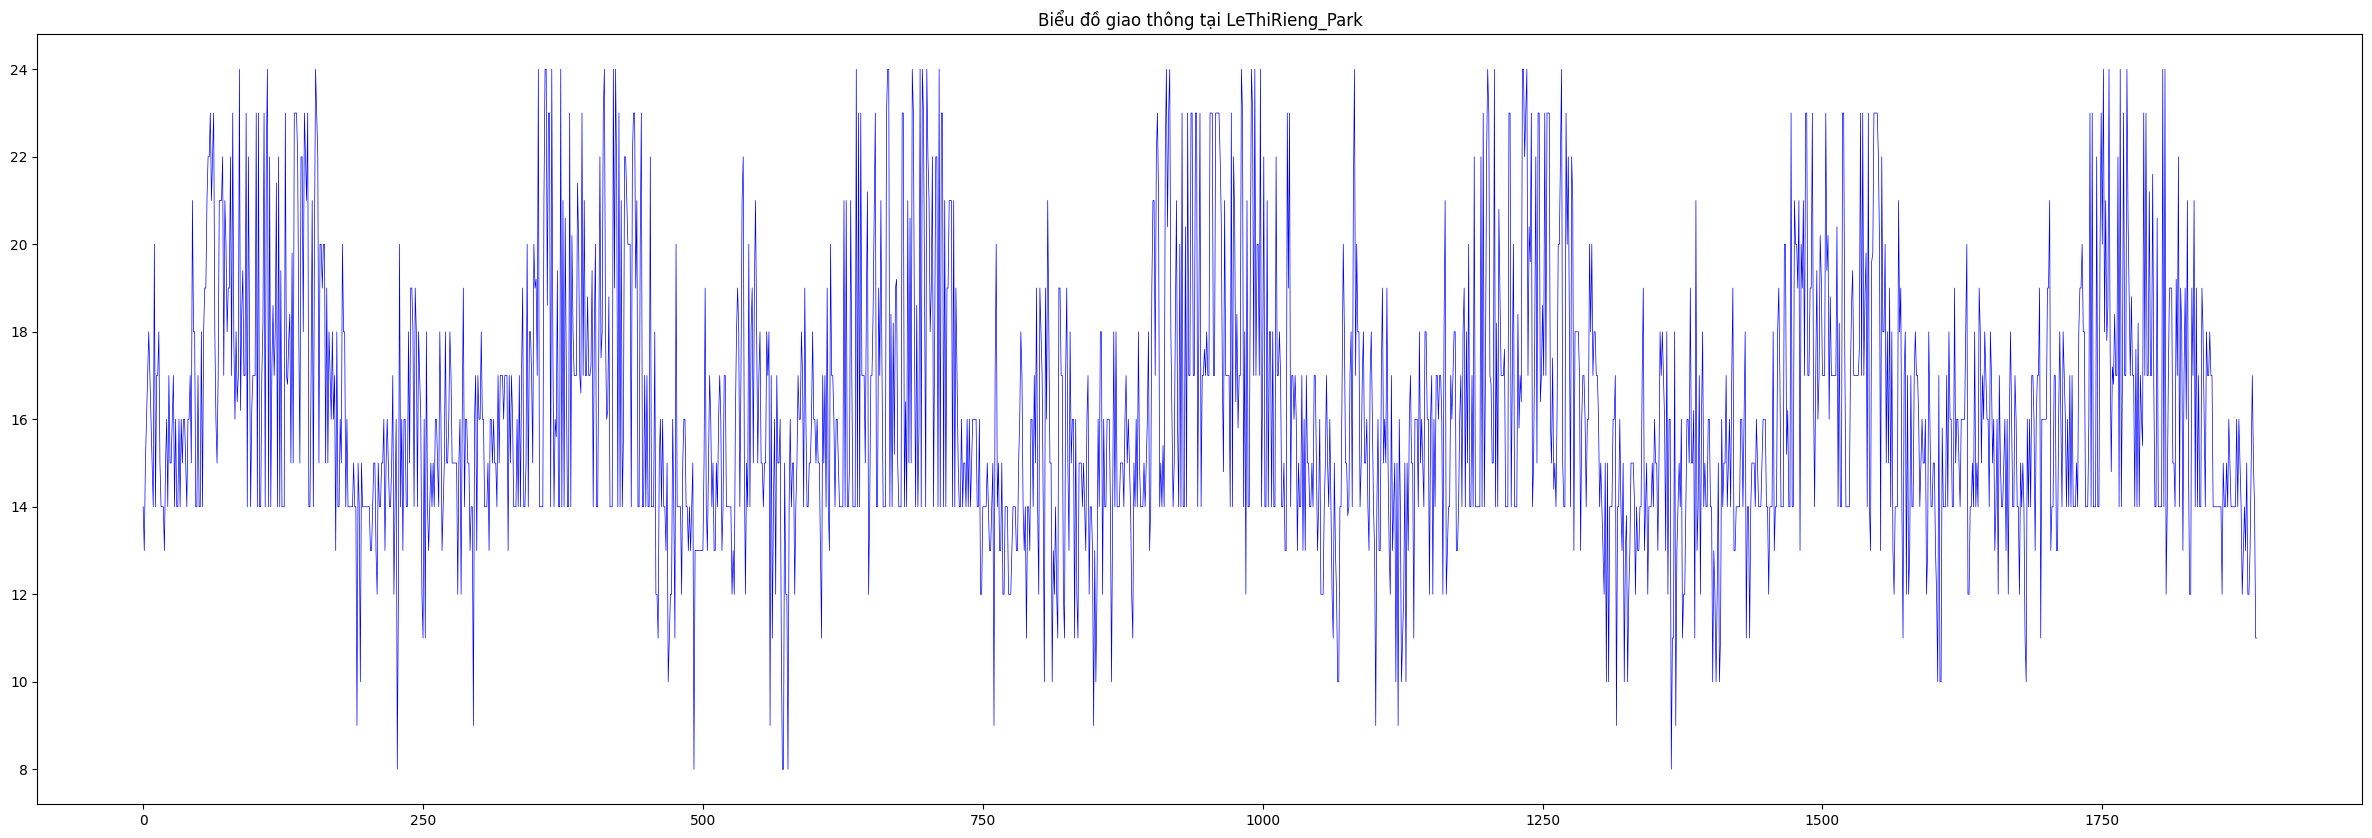

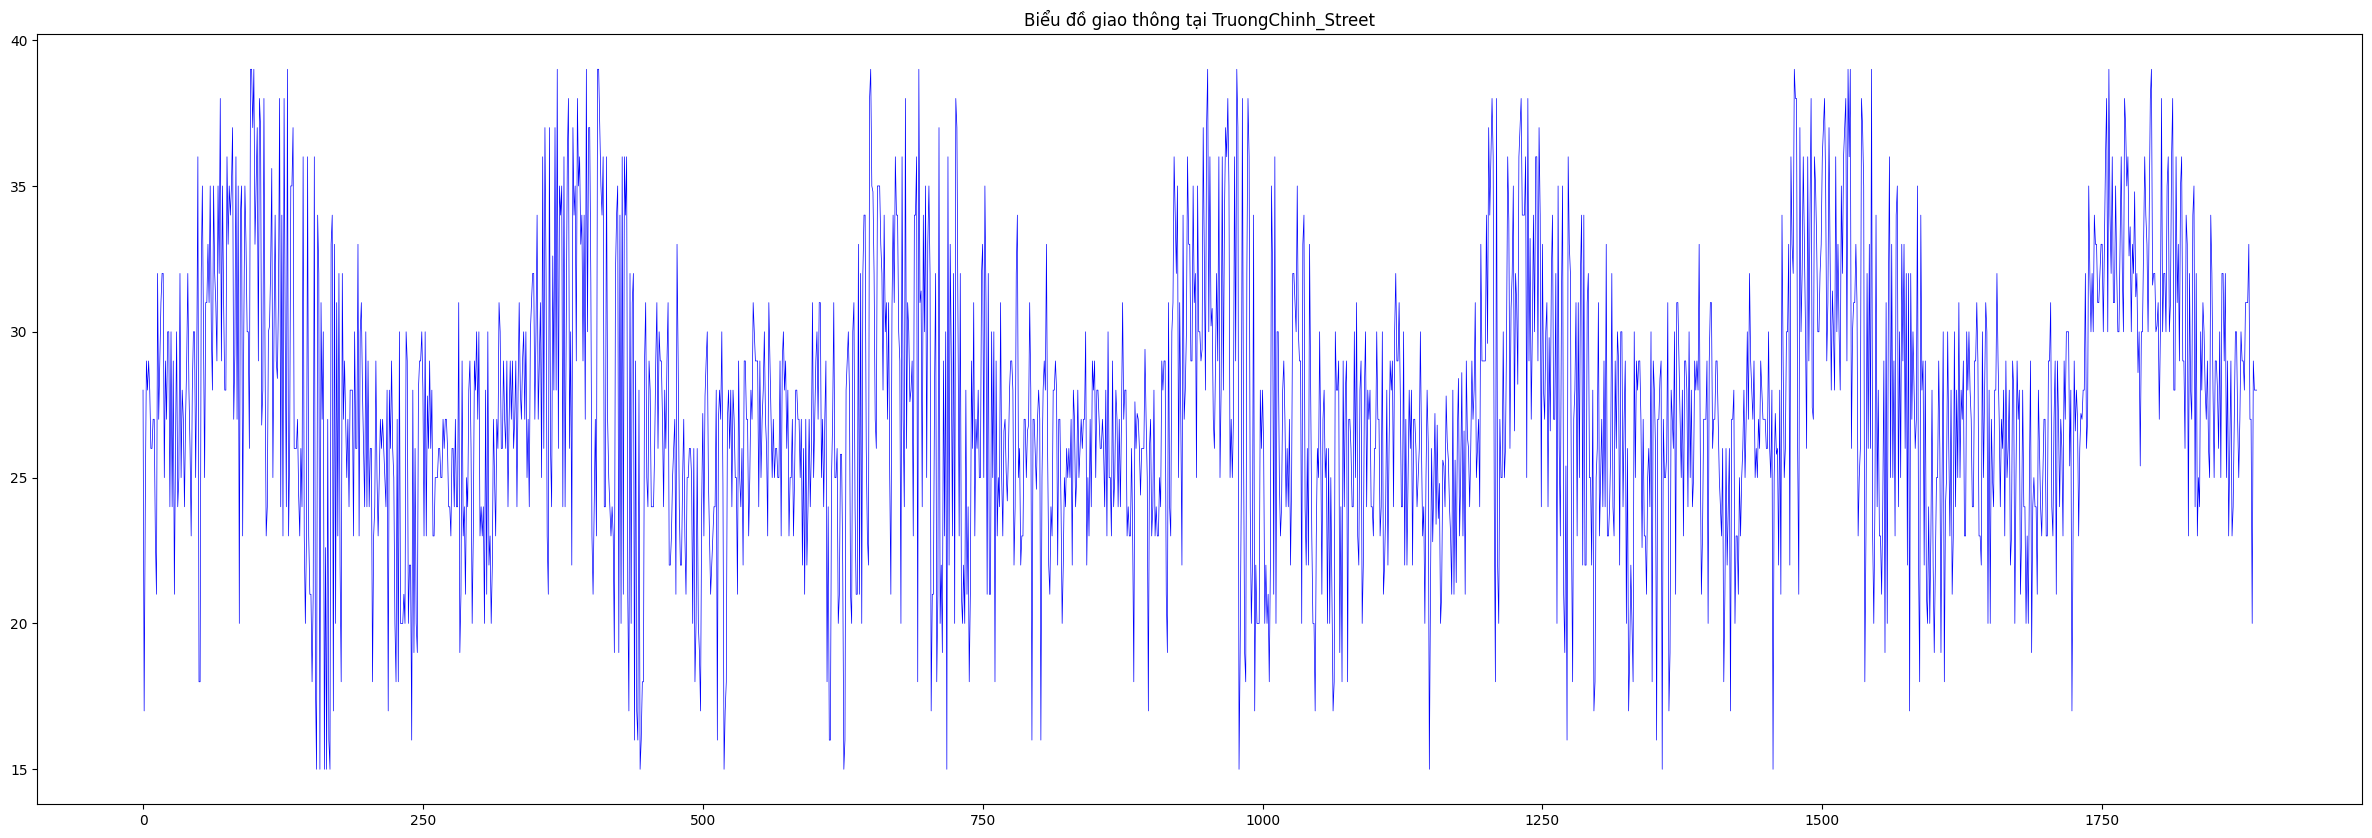

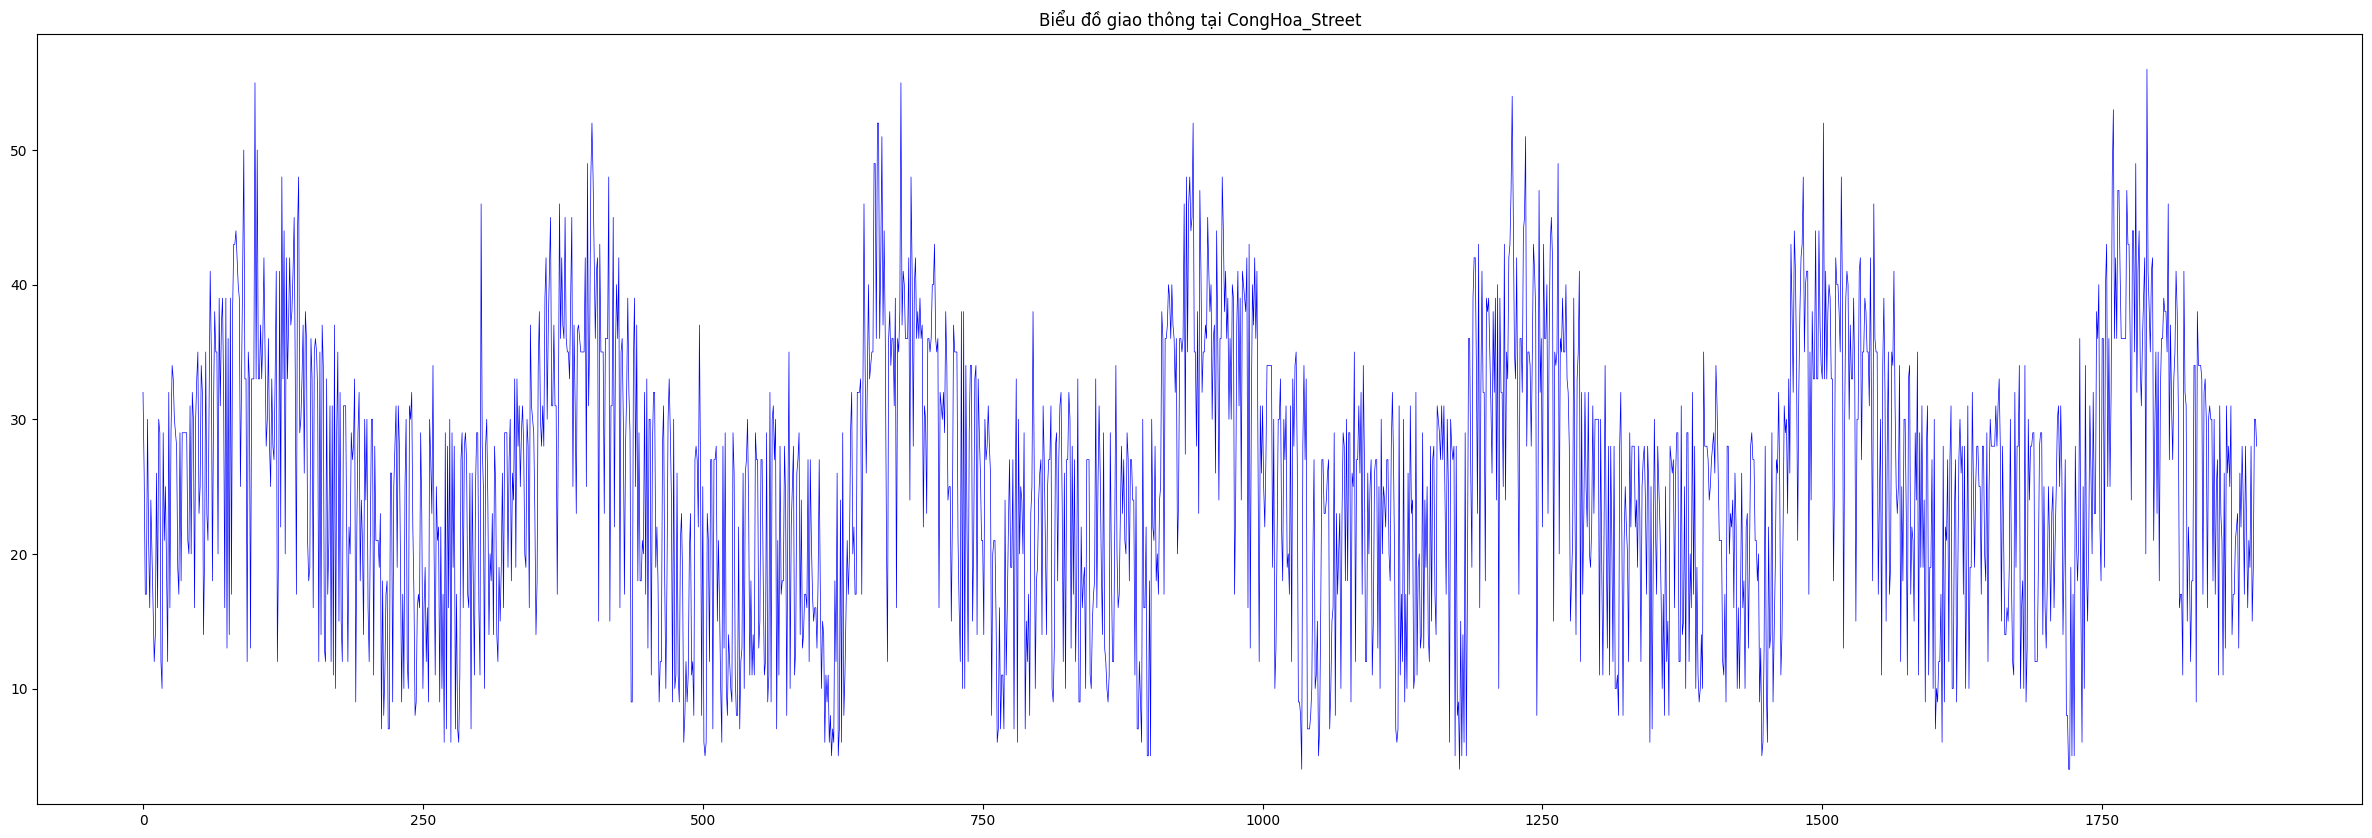

In [19]:
draw_plot(processed_data)

In [ ]:
processed_data.to_csv("processed_traffic_data.csv", index=False)    